# Dwarf Mass Limits & Optical Velocity

# Project Notes

NearbyGalaxies - master table (does not include optical velocities)
NearbyGalaxiesSE - identifies HI data source, fills in velocity reference, notes

These are based on McConnachie 2012 with additions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u

In [2]:
#Names only thing changed
NearbyGalaxies_master = pd.read_csv("./NearbyGalaxies_full_clean.dat", delim_whitespace=True ,header=(0))

In [3]:
NearbyGalaxies_trim = pd.read_csv("./NearbyGalaxiese_trim_clean.dat", delim_whitespace=True ,header=(0))

In [4]:
#We'll take these from master and eliminate duplicates
NearbyGalaxies_trim.drop(columns = ['RA1','RA2','RA3','Dec1','Dec2','Dec3','vh(km/s)','Data','MHI','mystery1','mystery2','mystery3','mystery4'],inplace = True)

In [5]:
#Just some cleaning up and clarifying names
NearbyGalaxies_master.rename(columns={'RA':'RA_hr','e1':'RA_min','e2':'RA_sec','Dec':'Dec_deg','e3':'Dec_arcmin','e4':'Dec_arcsec','(m-M)o':'m-M','e5':'m-M_err_pos','e6':'m-M_err_neg','e7':'Vmag_err_pos','e8':'Vmag_err_neg','e9':'rh_err_pos','e10':'rh_err_neg','e11':'vsig_err_pos','e12':'vsig_err_neg','e13':'vrot_s_err_pos','e14':'vrot_s_err_neg','e15':'vsig_g_err_pos','e16':'vsig_g_err_neg'},inplace = True)

In [6]:
#Combine to be comprehensive
NearbyGalaxies = pd.merge(NearbyGalaxies_master, NearbyGalaxies_trim, how='left', on='GalaxyName')

In [7]:
NearbyGalaxies

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,MHI,Data,Key,vsig_g,vsig_g_err_pos,vsig_g_err_neg,vrot_g,notes,M-m,Notes
0,#TheGalaxy,17,45,40.0,-29,0,28,9.999,99.99,9.99,...,99.90,x,u,99.9,99.9,99.9,999.9,NaN,NaN,NaN
1,#*CanisMajor,7,12,35.0,-27,40,0,0.264,14.29,0.30,...,99.90,x,u,99.9,99.9,99.9,999.9,NaN,NaN,NaN
2,SagittariusdSph,18,55,19.5,-30,32,43,0.153,17.10,0.15,...,0.00,x,u,0.0,0.0,0.0,0.0,NaN,17.10,(I don’t understand where the limit in GP or M...
3,TucanaIII,23,56,36.0,-59,36,0,9.999,17.01,0.16,...,99.90,x,u,99.9,99.9,99.9,999.9,NaN,17.01,"- Simon et al. 2017 V_hel = -102 km/s, velocit..."
4,DracoII,15,52,47.6,64,33,55,0.016,16.90,0.30,...,99.90,x,u,99.9,99.9,99.9,999.9,NaN,16.90,"- Martin et al. 2016 V_hel -347 km/s, dispersi..."
5,Segue(I),10,7,4.0,16,4,55,0.031,16.80,0.20,...,1.67,gs,u,0.0,0.0,0.0,0.0,NaN,16.80,148+18s.mir stdev (0.04K/9.1K/Jy)*5 = 0.02 Jy ...
6,Reticulum2,3,35,42.1,-54,2,57,9.999,17.40,0.20,...,99.90,x,u,99.9,99.9,99.9,999.9,NaN,17.40,"- Walker et al., Koposov et al. (2015), V_hel=..."
7,CetusII,1,17,52.8,-17,25,12,9.999,17.38,0.19,...,99.90,x,u,99.9,99.9,99.9,999.9,NaN,17.38,NEW not seeing velocity ref for this one
8,TriangulumII,2,13,17.4,36,10,42,0.081,17.40,0.10,...,2.20,gs,u,99.9,99.9,99.9,999.9,NaN,17.40,"36+34s.mir Martin et al. v_hel = -384 km/s, d..."
9,UrsaMajorII,8,51,30.0,63,7,48,0.094,17.50,0.30,...,0.00,x,u,0.0,0.0,0.0,0.0,NaN,17.50,"130.0 60.0 CAR CAR_H07.fits stdev 0.02K, if b..."


In [8]:
NearbyGalaxies.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'notes', 'M-m', 'Notes'],
      dtype='object')

In [9]:
#add in newly discovered Dwarfs
new_dwarfs = pd.read_csv('./newdwarfs.txt', delim_whitespace=True ,header=(0),comment='#')

In [10]:
#Just some cleaning up and clarifying names
new_dwarfs.rename(columns={'ra1':'RA_hr','ra2':'RA_min','ra3':'RA_sec','dec1':'Dec_deg','dec2':'Dec_arcmin','dec3':'Dec_arcsec','(m-M)o':'m-M','e5':'m-M_err_pos','e6':'m-M_err_neg'},inplace = True)

In [11]:
new_dwarfs

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,ra,dec,EB-V,m-M,m-M_err_pos,m-M_err_neg,vh(km/s),Notes
0,CetusIII,2.0,5.0,19.4,-4.0,16.0,12.0,31.3292,-4.2700,NaN,22.00,0.20,0.10,NaN,http://adsabs.harvard.edu/abs/2018PASJ...70S..18H
1,DESJ0225+0304,2.0,25.0,42.4,3.0,4.0,10.0,36.4250,3.0694,NaN,16.88,0.06,0.05,NaN,http://adsabs.harvard.edu/abs/2017MNRAS.468...97L
2,PictorII,6.0,44.0,43.2,-59.0,53.0,49.0,101.1792,-59.8969,0.107,18.30,0.12,0.15,NaN,http://adsabs.harvard.edu/abs/2016ApJ...833L...5D
3,VirgoI,12.0,0.0,9.6,0.0,40.0,48.0,180.0417,-0.6800,NaN,19.70,0.30,0.20,NaN,http://adsabs.harvard.edu/abs/2016ApJ...832...21H
4,HydrusI,2.0,29.0,33.3,-79.0,18.0,32.0,-0.6800,-79.3089,NaN,17.20,0.04,0.04,80.4,http://adsabs.harvard.edu/abs/2018MNRAS.479.5343K
5,CarinaII,NaN,NaN,NaN,NaN,NaN,NaN,114.1066,-57.9991,NaN,17.79,0.05,0.05,477.2,http://adsabs.harvard.edu/abs/2018MNRAS.475.5085T
6,CarinaIII,NaN,NaN,NaN,NaN,NaN,NaN,114.6298,-57.8997,NaN,17.22,0.10,0.10,284.6,http://adsabs.harvard.edu/abs/2018MNRAS.475.5085T
7,CraterII,NaN,NaN,NaN,NaN,NaN,NaN,177.3100,-18.4130,NaN,20.35,0.02,0.02,87.5,http://adsabs.harvard.edu/abs/2016MNRAS.459.2370T
8,AquariusII,NaN,NaN,NaN,NaN,NaN,NaN,338.4813,-9.3274,NaN,20.16,0.07,0.07,-71.1,http://adsabs.harvard.edu/abs/2016MNRAS.463..712T


In [12]:
NearbyGalaxies.rename(columns={'notes':'note'},inplace = True)

In [13]:
#merge new dwarfs into gals_merged df
frames = [NearbyGalaxies, new_dwarfs]
gals_merged = pd.concat(frames, sort=False)
gals_merged.reset_index(drop=True, inplace=True)
gals_merged

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,Key,vsig_g,vsig_g_err_pos,vsig_g_err_neg,vrot_g,note,M-m,Notes,ra,dec
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,u,99.9,99.9,99.9,999.9,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,u,99.9,99.9,99.9,999.9,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,u,0.0,0.0,0.0,0.0,NaN,17.10,(I don’t understand where the limit in GP or M...,NaN,NaN
3,TucanaIII,23.0,56.0,36.0,-59.0,36.0,0.0,9.999,17.01,0.16,...,u,99.9,99.9,99.9,999.9,NaN,17.01,"- Simon et al. 2017 V_hel = -102 km/s, velocit...",NaN,NaN
4,DracoII,15.0,52.0,47.6,64.0,33.0,55.0,0.016,16.90,0.30,...,u,99.9,99.9,99.9,999.9,NaN,16.90,"- Martin et al. 2016 V_hel -347 km/s, dispersi...",NaN,NaN
5,Segue(I),10.0,7.0,4.0,16.0,4.0,55.0,0.031,16.80,0.20,...,u,0.0,0.0,0.0,0.0,NaN,16.80,148+18s.mir stdev (0.04K/9.1K/Jy)*5 = 0.02 Jy ...,NaN,NaN
6,Reticulum2,3.0,35.0,42.1,-54.0,2.0,57.0,9.999,17.40,0.20,...,u,99.9,99.9,99.9,999.9,NaN,17.40,"- Walker et al., Koposov et al. (2015), V_hel=...",NaN,NaN
7,CetusII,1.0,17.0,52.8,-17.0,25.0,12.0,9.999,17.38,0.19,...,u,99.9,99.9,99.9,999.9,NaN,17.38,NEW not seeing velocity ref for this one,NaN,NaN
8,TriangulumII,2.0,13.0,17.4,36.0,10.0,42.0,0.081,17.40,0.10,...,u,99.9,99.9,99.9,999.9,NaN,17.40,"36+34s.mir Martin et al. v_hel = -384 km/s, d...",NaN,NaN
9,UrsaMajorII,8.0,51.0,30.0,63.0,7.0,48.0,0.094,17.50,0.30,...,u,0.0,0.0,0.0,0.0,NaN,17.50,"130.0 60.0 CAR CAR_H07.fits stdev 0.02K, if b...",NaN,NaN


In [14]:
gals_merged[gals_merged['Data'] == 'x']

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,Key,vsig_g,vsig_g_err_pos,vsig_g_err_neg,vrot_g,note,M-m,Notes,ra,dec
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,u,99.9,99.9,99.9,999.9,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,u,99.9,99.9,99.9,999.9,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,u,0.0,0.0,0.0,0.0,NaN,17.10,(I don’t understand where the limit in GP or M...,NaN,NaN
3,TucanaIII,23.0,56.0,36.0,-59.0,36.0,0.0,9.999,17.01,0.16,...,u,99.9,99.9,99.9,999.9,NaN,17.01,"- Simon et al. 2017 V_hel = -102 km/s, velocit...",NaN,NaN
4,DracoII,15.0,52.0,47.6,64.0,33.0,55.0,0.016,16.90,0.30,...,u,99.9,99.9,99.9,999.9,NaN,16.90,"- Martin et al. 2016 V_hel -347 km/s, dispersi...",NaN,NaN
6,Reticulum2,3.0,35.0,42.1,-54.0,2.0,57.0,9.999,17.40,0.20,...,u,99.9,99.9,99.9,999.9,NaN,17.40,"- Walker et al., Koposov et al. (2015), V_hel=...",NaN,NaN
7,CetusII,1.0,17.0,52.8,-17.0,25.0,12.0,9.999,17.38,0.19,...,u,99.9,99.9,99.9,999.9,NaN,17.38,NEW not seeing velocity ref for this one,NaN,NaN
9,UrsaMajorII,8.0,51.0,30.0,63.0,7.0,48.0,0.094,17.50,0.30,...,u,0.0,0.0,0.0,0.0,NaN,17.50,"130.0 60.0 CAR CAR_H07.fits stdev 0.02K, if b...",NaN,NaN
12,Willman1,10.0,49.0,21.0,51.0,3.0,0.0,0.014,17.90,0.40,...,u,0.0,0.0,0.0,0.0,NaN,17.90,NaN,NaN,NaN
14,TucanaIV,0.0,2.0,55.2,-60.0,51.0,0.0,9.999,18.41,0.19,...,u,99.9,99.9,99.9,999.9,NaN,18.41,- not seeing anything for this one,NaN,NaN


In [15]:
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'note', 'M-m', 'Notes', 'ra', 'dec'],
      dtype='object')

In [16]:
gals_merged[gals_merged['GalaxyName'] == 'IC5152']

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,Key,vsig_g,vsig_g_err_pos,vsig_g_err_neg,vrot_g,note,M-m,Notes,ra,dec
115,IC5152,22.0,2.0,41.5,-51.0,17.0,47.0,0.025,26.45,0.05,...,u,99.9,99.9,99.9,99.9,NaN,26.45,NaN,NaN,NaN


In [17]:
gals_merged['vsig_s_upper_limit'] = np.nan

In [18]:
#Adding values for 
gals_merged.loc[gals_merged['GalaxyName'] == 'TriangulumII', 'vsig_s_upper_limit'] = 3.4
gals_merged.loc[gals_merged['GalaxyName'] == 'HydraII', 'vsig_s_upper_limit'] = 3.6
gals_merged.loc[gals_merged['GalaxyName'] == 'GrusI', 'vsig_s'] = 2.9
gals_merged.loc[gals_merged['GalaxyName'] == 'Pegasus3', 'vsig_s'] = 5.4
gals_merged.loc[gals_merged['GalaxyName'] == 'Pegasus3', 'vh(km/s)'] = -223
gals_merged.loc[gals_merged['GalaxyName'] == 'Phoenix', 'vsig_s'] = 9.3
gals_merged.loc[gals_merged['GalaxyName'] == 'Eridanus2', 'vh(km/s)'] = 75.6
gals_merged.loc[gals_merged['GalaxyName'] == 'AntliaB', 'vsig_g'] = 7.2
gals_merged.loc[gals_merged['GalaxyName'] == 'HIZSS3(A)', 'vsig_g'] = 23
gals_merged.loc[gals_merged['GalaxyName'] == 'HIZSS3B', 'vsig_g'] = 11.9
gals_merged.loc[gals_merged['GalaxyName'] == 'LeoP', 'vrot_g'] = 15
gals_merged.loc[gals_merged['GalaxyName'] == 'LeoP', 'vsig_g'] = 8.4
gals_merged.loc[gals_merged['GalaxyName'] == 'IC5152', 'vrot_g'] = 58
gals_merged.loc[gals_merged['GalaxyName'] == 'IC5152', 'vsig_g'] = 36

In [19]:
#Add orbits from lit
gals_merged["orb_pericenter"] = np.nan
gals_merged["orb_apocenter"] = np.nan
gals_merged["orb_eccentricity"] = np.nan
gals_merged["orb_period"] = np.nan
gals_merged["orb_period_type"] = np.nan

#Ultrafaints, from Simon 2018 (GAIA)
gals_merged.loc[gals_merged['GalaxyName'] == 'TriangulumII', 'orb_pericenter'] = 20
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue2', 'orb_pericenter'] = 32
gals_merged.loc[gals_merged['GalaxyName'] == 'HydrusI', 'orb_pericenter'] = 26
gals_merged.loc[gals_merged['GalaxyName'] == 'HorologiumI', 'orb_pericenter'] = 87
gals_merged.loc[gals_merged['GalaxyName'] == 'ReticulumII', 'orb_pericenter'] = 29
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaII', 'orb_pericenter'] = 28
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaIII', 'orb_pericenter'] = 29
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorII', 'orb_pericenter'] = 39
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue1', 'orb_pericenter'] = 20
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorI', 'orb_pericenter'] = 102
gals_merged.loc[gals_merged['GalaxyName'] == 'Willman1', 'orb_pericenter'] = 44
gals_merged.loc[gals_merged['GalaxyName'] == 'ComaBerenices', 'orb_pericenter'] = 43
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesII', 'orb_pericenter'] = 39
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesI', 'orb_pericenter'] = 45
gals_merged.loc[gals_merged['GalaxyName'] == 'DracoII', 'orb_pericenter'] = 20
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaII', 'orb_pericenter'] = 39
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaIII', 'orb_pericenter'] = 3


gals_merged.loc[gals_merged['GalaxyName'] == 'TriangulumII', 'orb_apocenter'] = 541
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue2', 'orb_apocenter'] = 54
gals_merged.loc[gals_merged['GalaxyName'] == 'HydrusI', 'orb_apocenter'] = 1029
gals_merged.loc[gals_merged['GalaxyName'] == 'HorologiumI', 'orb_apocenter'] = 741
gals_merged.loc[gals_merged['GalaxyName'] == 'ReticulumII', 'orb_apocenter'] = 91
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaII', 'orb_apocenter'] = 1521
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaIII', 'orb_apocenter'] = 1478
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorII', 'orb_apocenter'] = 201
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue1', 'orb_apocenter'] = 61
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorI', 'orb_apocenter'] = 896
gals_merged.loc[gals_merged['GalaxyName'] == 'Willman1', 'orb_apocenter'] = 53
gals_merged.loc[gals_merged['GalaxyName'] == 'ComaBerenices', 'orb_apocenter'] = 242
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesII', 'orb_apocenter'] = 1746
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesI', 'orb_apocenter'] = 116
gals_merged.loc[gals_merged['GalaxyName'] == 'DracoII', 'orb_apocenter'] = 223
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaII', 'orb_apocenter'] = 626
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaIII', 'orb_apocenter'] = 49

gals_merged.loc[gals_merged['GalaxyName'] == 'TriangulumII', 'orb_eccentricity'] = 0.93
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue2', 'orb_eccentricity'] = 0.32
gals_merged.loc[gals_merged['GalaxyName'] == 'HydrusI', 'orb_eccentricity'] = 0.95
gals_merged.loc[gals_merged['GalaxyName'] == 'HorologiumI', 'orb_eccentricity'] = 0.79
gals_merged.loc[gals_merged['GalaxyName'] == 'ReticulumII', 'orb_eccentricity'] = 0.51
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaII', 'orb_eccentricity'] = 0.96
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaIII', 'orb_eccentricity'] = 0.96
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorII', 'orb_eccentricity'] = 0.67
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue1', 'orb_eccentricity'] = 0.52
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorI', 'orb_eccentricity'] = 0.79
gals_merged.loc[gals_merged['GalaxyName'] == 'Willman1', 'orb_eccentricity'] = 0.19
gals_merged.loc[gals_merged['GalaxyName'] == 'ComaBerenices', 'orb_eccentricity'] = 0.70
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesII', 'orb_eccentricity'] = 0.96
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesI', 'orb_eccentricity'] = 0.44
gals_merged.loc[gals_merged['GalaxyName'] == 'DracoII', 'orb_eccentricity'] = 0.84
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaII', 'orb_eccentricity'] = 0.78
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaIII', 'orb_eccentricity'] = 0.90

gals_merged.loc[gals_merged['GalaxyName'] == 'TriangulumII', 'orb_period'] = 10
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue2', 'orb_period'] = 1.1
gals_merged.loc[gals_merged['GalaxyName'] == 'HydrusI', 'orb_period'] = 10
gals_merged.loc[gals_merged['GalaxyName'] == 'ReticulumII', 'orb_period'] = 1.6
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaII', 'orb_period'] = 10
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaIII', 'orb_period'] = 10
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorII', 'orb_period'] = 3.5
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue1', 'orb_period'] = 1.1
gals_merged.loc[gals_merged['GalaxyName'] == 'Willman1', 'orb_period'] = 1.2
gals_merged.loc[gals_merged['GalaxyName'] == 'ComaBerenices', 'orb_period'] = 3.7
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesII', 'orb_period'] = 10
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesI', 'orb_period'] = 2.4
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaIII', 'orb_period'] = 0.7

gals_merged.loc[gals_merged['GalaxyName'] == 'TriangulumII', 'orb_period_type'] = "lower_limit"
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue2', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'HydrusI', 'orb_period_type'] = "lower_limit"
gals_merged.loc[gals_merged['GalaxyName'] == 'ReticulumII', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaII', 'orb_period_type'] = "lower_limit"
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaIII', 'orb_period_type'] = "lower_limit"
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorII', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue1', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'Willman1', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'ComaBerenices', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesII', 'orb_period_type'] = "lower_limit"
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesI', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaIII', 'orb_period_type'] = "value"


In [221]:
#Draco, from Subaru (Casetti-Dinescu, Dana I. 2016, conflicting values from Pryo 2015)
gals_merged.loc[gals_merged['GalaxyName'] == 'Draco', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'Draco', 'orb_period'] = 1.4
gals_merged.loc[gals_merged['GalaxyName'] == 'Draco', 'orb_pericenter'] = 21
gals_merged.loc[gals_merged['GalaxyName'] == 'Draco', 'orb_apocenter'] = 97
gals_merged.loc[gals_merged['GalaxyName'] == 'Draco', 'orb_eccentricity'] = 0.66

In [222]:
#Fornax, from Piatek 2007. There was follow-up publications on Fornax but I didn't dwell
gals_merged.loc[gals_merged['GalaxyName'] == 'Fornax', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'Fornax', 'orb_period'] = 3.2
gals_merged.loc[gals_merged['GalaxyName'] == 'Fornax', 'orb_pericenter'] = 118
gals_merged.loc[gals_merged['GalaxyName'] == 'Fornax', 'orb_apocenter'] = 152
gals_merged.loc[gals_merged['GalaxyName'] == 'Fornax', 'orb_eccentricity'] = 0.13

In [20]:
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'note', 'M-m', 'Notes', 'ra', 'dec', 'vsig_s_upper_limit',
       'orb_pericenter', 'orb_apocenter', 'orb_eccentricity', 'orb_period',
       'orb_period_type'],
      dtype='object')

In [21]:
gals_merged[gals_merged['GalaxyName'] == 'TriangulumII']['vh(km/s)']

8   -384.0
Name: vh(km/s), dtype: float64

TO DO:

Change Eridanus2 to known velocity now that we know it!

# Calculate distances from distance Modulus

In [22]:
gals_merged['dist_pc'] = np.sqrt((100*100**((gals_merged['m-M']/5))))

In [23]:
gals_merged['dist_kpc'] = gals_merged['dist_pc']/1000

In [24]:
gals_merged['dist_mpc'] = gals_merged['dist_pc']/1000000

In [25]:
gals_merged[['GalaxyName','Data','MHI','m-M','M-m','dist_mpc']]

,GalaxyName,Data,MHI,m-M,M-m,dist_mpc
0,#TheGalaxy,x,99.90,99.99,NaN,9.954054e+14
1,#*CanisMajor,x,99.90,14.29,NaN,7.211075e-03
2,SagittariusdSph,x,0.00,17.10,17.10,2.630268e-02
3,TucanaIII,x,99.90,17.01,17.01,2.523481e-02
4,DracoII,x,99.90,16.90,16.90,2.398833e-02
5,Segue(I),gs,1.67,16.80,16.80,2.290868e-02
6,Reticulum2,x,99.90,17.40,17.40,3.019952e-02
7,CetusII,x,99.90,17.38,17.38,2.992265e-02
8,TriangulumII,gs,2.20,17.40,17.40,3.019952e-02
9,UrsaMajorII,x,0.00,17.50,17.50,3.162278e-02


# Check Mass Limits on Each Dwarf

Here I go through the table one by one and check mass limits where necessary with the appropriate information from the tables folder depending on the data source associated with that galaxy, and also check the galfa data for detections

In [26]:
#to see notes without them being truncated
pd.set_option("display.max_colwidth", 10000)

# Load contents of table files for each data source/case combination

In [27]:
galfa_unresolved_undetected = pd.read_csv('./tables/galfa_unresolved_undetected_clean.txt', delim_whitespace=True ,header=(0),comment='#')
galfa_unresolved_undetected

,GalaxyName,rh,MHI,std30_med_g,std30_med_h,MHI_g,MHI_h
0,BootesIII,99.99,99.9,0.037923,NaN,17.09138,NaN
1,CanesVenaticiII,1.60,0.0,0.078217,0.013089,519.00588,474.21009
2,PiscesII,1.10,99.9,0.037429,NaN,321.42495,NaN
3,Pegasus3,1.30,99.9,0.055000,NaN,NaN,NaN
4,AndromedaXI,0.71,0.0,0.069377,0.012132,9707.05599,9268.51441
5,AndromedaXX,0.53,99.9,0.075920,0.017230,10819.92472,13407.35803
6,AndromedaXIII,0.78,0.0,0.076044,0.018760,13897.46464,18719.38047
7,AndromedaXIV,1.70,0.0,0.029043,0.016321,4752.33774,14581.57512
8,AndromedaXII,1.20,0.0,0.070827,0.016336,15851.40892,19962.45423
9,AndromedaXXIX,1.70,99.9,0.036159,NaN,5012.81372,NaN


In [28]:
galfa_resolved_undetected = pd.read_csv('./tables/galfa_resolved_undetected_table_clean.txt', delim_whitespace=True ,header=(0),comment='#')
galfa_resolved_undetected

,GalaxyName,med_std,v_-5,v_-4,v_-3,v_-2,v_-1,v_0,v_+1,v_+2,v_+3,v_+4,v_+5,MHI_limit
0,Segue(I),0.017123,0.020954,0.020997,0.019659,0.018380,0.017681,0.017123,0.016192,0.014794,0.013582,0.012936,0.012643,9.33124
1,TriangulumII,0.033360,0.032310,0.035480,0.041173,0.044659,0.043152,0.037963,0.033360,0.031326,0.029874,0.027878,0.025896,31.59340
2,BootesII,0.020185,0.026547,0.024216,0.020185,0.016058,0.013231,0.013089,0.015978,0.019443,0.021502,0.022890,0.023712,36.42430
3,ComaBerenices,0.011513,0.017993,0.018037,0.017272,0.016089,0.014207,0.011513,0.009089,0.007597,0.006588,0.006316,0.006658,22.78040
4,Bootes(I),0.024946,0.020448,0.019055,0.019703,0.021678,0.023773,0.025247,0.025994,0.026299,0.026131,0.025314,0.024946,114.12000
5,Hercules,0.028245,0.027603,0.028245,0.029470,0.030828,0.031628,0.031415,0.029572,0.026164,0.023573,0.024793,0.027962,509.70000
6,LeoIV,0.018579,0.023945,0.019971,0.017264,0.017018,0.018579,0.019500,0.019310,0.018564,0.018563,0.019044,0.018400,458.54800
7,CanesVenaticu(I),0.016252,0.024369,0.021633,0.018487,0.016273,0.015959,0.016252,0.016039,0.015467,0.015233,0.015825,0.016702,800.34100
8,LeoI,0.031631,0.029137,0.030867,0.033413,0.036775,0.037608,0.034692,0.030318,0.027769,0.028897,0.031631,0.032785,2110.97000
9,AndromedaXIX,0.038535,0.039503,0.039608,0.039136,0.038333,0.038535,0.039022,0.037862,0.035554,0.034288,0.035590,0.039367,26928.90000


In [29]:
hi4pi_resolved_undetected = pd.read_csv('./tables/hi4pi_resolved_undetected_table_clean.txt', delim_whitespace=True ,header=(0),comment='#')
hi4pi_resolved_undetected

,GalaxyName,med_std,v_-5,v_-4,v_-3,v_-2,v_-1,v_0,v_+1,v_+2,v_+3,v_+4,v_+5
0,UrsaMajorII,0.33041,0.29192,0.29070,0.29266,0.39312,0.52351,0.51525,0.36989,0.29312,0.32788,0.34514,0.33041
1,Tucana2,0.11744,0.13279,0.13210,0.09946,0.07456,0.08875,0.11781,0.13724,0.12786,0.10454,0.10228,0.11744
2,Draco,0.21153,0.12404,0.10974,0.13890,0.15178,0.21153,0.28788,0.29272,0.25904,0.24986,0.21300,0.14644
3,Sextans(I),0.57736,0.42631,0.48201,0.57736,0.65398,0.65606,0.67766,0.70233,0.59833,0.49953,0.56530,0.52435
4,UrsaMajor(I),1.12877,0.75418,0.87294,0.96666,1.03453,1.08105,1.12877,1.20459,1.30527,1.38664,1.41153,1.41080
5,CraterII,4.58920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
hi4pi_unresolved_undetected = pd.read_csv('./tables/hi4pi_unresolved_undetected_clean.txt', delim_whitespace=True ,header=(0),comment='#')
hi4pi_unresolved_undetected

,GalaxyName,rh,MHI,std30_med,Notes
0,TucanaIII,6.00,99.90,0.020382,NaN
1,DracoII,2.70,99.90,0.017329,NaN
2,Reticulum2,3.64,99.90,0.020559,NaN
3,CetusII,1.90,99.90,NaN,no v
4,TucanaIV,9.10,99.90,NaN,no v
5,GrusII,6.00,99.90,NaN,no v
6,TucanaV,1.00,99.90,NaN,no v
7,SagittariusII,2.00,99.90,NaN,no v
8,HorologiumII,2.09,99.90,NaN,no v
9,Horologium1,1.31,99.90,0.017110,NaN


In [31]:
hi4pi_novelocity = pd.read_csv('./tables/hi4pi_novelocity_clean.txt', delim_whitespace=True ,header=(0),comment='#')
hi4pi_novelocity

,GalaxyName,med
0,CetusII,0.020
1,TucanaIV,0.010
2,GrusII,0.020
3,TucanaV,0.018
4,SagittariusII,0.020
5,HorologiumII,0.018
6,Eridanus3,0.020
7,Phoenix2,0.017
8,ReticulumIII,0.017
9,Indus1,0.020


In [32]:
galfa_novelocity = pd.read_csv('./tables/galfa_novelocity_clean.txt', delim_whitespace=True ,header=(0),comment='#')
galfa_novelocity

,GalaxyName,med


In [33]:
add_unresolved = pd.read_csv('./tables/unresolved_undetected_result.txt', delim_whitespace=True,comment='#')
add_unresolved

,GalaxyName,med_std_30arcmin(K)
0,CetusIII,0.0189
1,DESJ0225+0304,0.0967
2,PictorII,0.0193
3,VirgoI,0.0825
4,CarinaII,0.0238
5,CarinaIII,0.0185
6,AquariusII,0.0212
7,HydrusI,0.0231
8,AndromedaXXV,0.0619
9,Willman1,0.3600


These are the ones added later by Yong

In [34]:
add_hi4pi = pd.read_csv('./tables/check_hi4pi_limits_result.txt', delim_whitespace=True ,header=(0),comment='#')
add_hi4pi

,GalaxyName,med_std_30arcmin(K),med_std_1deg(K),Note
0,TriangulumII,0.0188,0.0203,TriangulumII_HasVelTable_hi4pi.npy
1,LeoI,0.0224,0.0246,LeoI_HasVelTable_hi4pi.npy
2,AndromedaXIX,0.0360,0.0762,AndromedaXIX_HasVelTable_hi4pi.npy
3,AndromedaXVI,0.0244,0.0284,AndromedaXVI_HasVelTable_hi4pi.npy


In [35]:
add_resolved = pd.read_csv('./tables/resolved_undetected_hi4pi.txt', delim_whitespace=True ,header=(0),comment='#')
add_resolved

,GalaxyName,RA,DEC,PA,e=1-b/a,rh(arcmins),vh(m/s),HI4PI,npix
0,UrsaMajorII,8h51m30.0s,63d7m48s,98.0,0.63,16.00,-116500.0,CAR_H07,25
1,Tucana2,22h51m55.1s,-58d34m8s,107.0,0.39,9.83,-129000.0,CAR_B18,13
2,Draco,17h20m12.4s,57d54m55s,89.0,0.31,10.00,-291000.0,CAR_H13,17
3,Sextans(I),10h13m3.0s,-1d36m53s,56.0,0.35,27.80,224200.0,CAR_E08,77
4,UrsaMajor(I),10h34m52.8s,51d55m12s,71.0,0.80,11.30,-55300.0,CAR_H08,11
5,CraterII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149


In [36]:
#just to check a specific galaxy
gals_merged[gals_merged['GalaxyName'] == "CraterII"]

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,dec,vsig_s_upper_limit,orb_pericenter,orb_apocenter,orb_eccentricity,orb_period,orb_period_type,dist_pc,dist_kpc,dist_mpc
140,CraterII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.35,0.02,...,-18.413,NaN,NaN,NaN,NaN,NaN,NaN,117489.755494,117.489755,0.11749


In [37]:
#make some blank columns
gals_merged['MHI_computed'] = np.nan
gals_merged['MHI_source'] = np.nan
gals_merged['MHI_type'] = np.nan
#gals_merged['type_color'] = np. nan
#gals_merged['source_color'] = np. nan
gals_merged['1sigma'] = np.nan
gals_merged['rh_subtable'] = np.nan
gals_merged['MHI_method'] = np.nan
#galfa, galfa_smoothed, hi4pi, hi4pi_resolved, literature
gals_merged['npix'] = np.nan
gals_merged['GUU'] = np.nan
gals_merged['GRU'] = np.nan
gals_merged['HUU'] = np.nan
gals_merged['HRU'] = np.nan
gals_merged['GNV'] = np.nan
gals_merged['HNV'] = np.nan
gals_merged['LIT'] = np.nan
gals_merged['1sigma_GUU'] = np.nan
gals_merged['1sigma_GRU'] = np.nan
gals_merged['1sigma_HUU'] = np.nan
gals_merged['1sigma_HRU'] = np.nan
gals_merged['1sigma_GNV'] = np.nan
gals_merged['1sigma_HNV'] = np.nan

In [38]:
#Add npix where relevant
for i, row in add_resolved.iterrows():
    gals_merged.loc[gals_merged['GalaxyName'] == add_resolved['GalaxyName'][i], 'npix'] = add_resolved['npix'][i]

In [39]:
#Calculate mass limits for any possible cases
for i, row in gals_merged.iterrows():
    print('Now calculating all possibilities for: ',gals_merged['GalaxyName'][i])

    for j, row in galfa_unresolved_undetected.iterrows():
        if (galfa_unresolved_undetected['GalaxyName'][j] == gals_merged['GalaxyName'][i]):
            gals_merged['rh_subtable'][i] = galfa_unresolved_undetected['rh'][j]
            galfa_limit = np.nan
            galfa_limit = galfa_unresolved_undetected['std30_med_g'][j]*5*(1/9.1)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            hi4pi_limit = galfa_unresolved_undetected['std30_med_h'][j]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            if ((np.isnan(hi4pi_limit)) | (galfa_limit < hi4pi_limit)): 
                gals_merged.loc[gals_merged['GalaxyName'] == galfa_unresolved_undetected['GalaxyName'][j], '1sigma_GUU'] = galfa_unresolved_undetected['std30_med_g'][j]
                gals_merged.loc[gals_merged['GalaxyName'] == galfa_unresolved_undetected['GalaxyName'][j], 'GUU'] = galfa_unresolved_undetected['std30_med_g'][j]*5*(1/9.1)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
                print('galfa limit is lower')
            elif((np.isnan(galfa_limit)) | (galfa_limit > hi4pi_limit)):
                gals_merged.loc[gals_merged['GalaxyName'] == galfa_unresolved_undetected['GalaxyName'][j], '1sigma_HUU'] = galfa_unresolved_undetected['std30_med_h'][j]
                gals_merged.loc[gals_merged['GalaxyName'] == galfa_unresolved_undetected['GalaxyName'][j], 'HUU'] = galfa_unresolved_undetected['std30_med_h'][j]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
                print('hi4pi limit is lower')
            else:
                print('Houston, we have a problem')
            print("GUU",galfa_unresolved_undetected['GalaxyName'][j],gals_merged['GalaxyName'][i],gals_merged['GUU'][i])
    
    for k, row in galfa_resolved_undetected.iterrows():
        if (galfa_resolved_undetected['GalaxyName'][k] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == galfa_resolved_undetected['GalaxyName'][k], '1sigma_GRU'] = galfa_resolved_undetected['med_std'][k]
            gals_merged.loc[gals_merged['GalaxyName'] == galfa_resolved_undetected['GalaxyName'][k], 'GRU'] = galfa_resolved_undetected['med_std'][k]*5*(0.44)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("GRU",galfa_resolved_undetected['GalaxyName'][k],gals_merged['GalaxyName'][i],gals_merged['GRU'][i])
    
    for l, row in hi4pi_resolved_undetected.iterrows():
        if (hi4pi_resolved_undetected['GalaxyName'][l] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_resolved_undetected['GalaxyName'][l], 'rh_subtable'] = hi4pi_unresolved_undetected['rh'][l]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_resolved_undetected['GalaxyName'][l], '1sigma_HRU'] = hi4pi_resolved_undetected['med_std'][l]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_resolved_undetected['GalaxyName'][l], 'HRU'] = (hi4pi_resolved_undetected['med_std'][l]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i]))/gals_merged['npix'][i]
            print("HRU",hi4pi_resolved_undetected['GalaxyName'][l],gals_merged['GalaxyName'][i],gals_merged['HRU'][i])
    
    for m, row in hi4pi_unresolved_undetected.iterrows():
        if (hi4pi_unresolved_undetected['GalaxyName'][m] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_unresolved_undetected['GalaxyName'][m], 'rh_subtable'] = hi4pi_unresolved_undetected['rh'][m]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_unresolved_undetected['GalaxyName'][m], '1sigma_HUU'] = hi4pi_unresolved_undetected['std30_med'][m]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_unresolved_undetected['GalaxyName'][m], 'HUU'] = hi4pi_unresolved_undetected['std30_med'][m]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("HUU",hi4pi_unresolved_undetected['GalaxyName'][m],gals_merged['GalaxyName'][i],gals_merged['HUU'][i])
    
    for n, row in galfa_novelocity.iterrows():
        if (galfa_novelocity['GalaxyName'][n] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == galfa_novelocity['GalaxyName'][n], '1sigma_GNV'] = galfa_novelocity['med'][n]
            gals_merged.loc[gals_merged['GalaxyName'] == galfa_novelocity['GalaxyName'][n], 'GNV'] = galfa_novelocity['med'][n]*5*(1/9.1)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("GNV",galfa_novelocity['GalaxyName'][n],gals_merged['GalaxyName'][i],gals_merged['GNV'][i])
                  
    for o, row in hi4pi_novelocity.iterrows():
        if (hi4pi_novelocity['GalaxyName'][o] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_novelocity['GalaxyName'][o], '1sigma_HNV'] = hi4pi_novelocity['med'][o]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_novelocity['GalaxyName'][o], 'HNV'] = hi4pi_novelocity['med'][o]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("HNV",hi4pi_novelocity['GalaxyName'][o],gals_merged['GalaxyName'][i],gals_merged['HNV'][i])

    for p, row in add_unresolved.iterrows():
        if (add_unresolved['GalaxyName'][p] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], '1sigma'] = add_unresolved['med_std_30arcmin(K)'][p]
            if(add_unresolved['GalaxyName'][p] in ['DESJ0225+0304','VirgoI']):
                gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], 'GUU'] = add_unresolved['med_std_30arcmin(K)'][p]*5.0*(1.0/9.1)*10.0*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
                gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], '1sigma_GUU'] = add_unresolved['med_std_30arcmin(K)'][p]
                print("GUU_ADD",add_unresolved['GalaxyName'][p],gals_merged['GalaxyName'][i],gals_merged['GUU'][i])
            else:
                gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], 'HUU'] = add_unresolved['med_std_30arcmin(K)'][p]*5.0*0.6*10.0*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
                gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], '1sigma_HUU'] = add_unresolved['med_std_30arcmin(K)'][p]
                print("HUU_ADD",add_unresolved['GalaxyName'][p],gals_merged['GalaxyName'][i],gals_merged['HUU'][i])

    for q, row in add_hi4pi.iterrows():
        if (add_hi4pi['GalaxyName'][q] == gals_merged['GalaxyName'][i]):
            #if ((add_hi4pi['med_std_30arcmin(K)'][q]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])) < gals_merged['MHI_computed'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == add_hi4pi['GalaxyName'][q], '1sigma_HUU'] = add_hi4pi['med_std_30arcmin(K)'][q]
            gals_merged.loc[gals_merged['GalaxyName'] == add_hi4pi['GalaxyName'][q], 'HUU'] = add_hi4pi['med_std_30arcmin(K)'][q]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("HUU_ADD",add_hi4pi['GalaxyName'][q],gals_merged['GalaxyName'][i],gals_merged['HUU'][i])
                      
    if((gals_merged['MHI'][i] != 99.90) & (gals_merged['MHI'][i] != 0) & (gals_merged['MHI'][i] != np.nan) & (gals_merged['Data'][i] == 'x') & (gals_merged['GalaxyName'][i] not in ['Sculptor','Fornax'])):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'LIT'] = (gals_merged['MHI'][i])*1000000
        print("LIT",gals_merged['GalaxyName'][i],gals_merged['MHI'][i],gals_merged['LIT'][i])

Now calculating all possibilities for:  #TheGalaxy
Now calculating all possibilities for:  #*CanisMajor
Now calculating all possibilities for:  SagittariusdSph
Now calculating all possibilities for:  TucanaIII
HUU TucanaIII TucanaIII 91.89114490090122
Now calculating all possibilities for:  DracoII
HUU DracoII DracoII 70.60196425864088
Now calculating all possibilities for:  Segue(I)
GRU Segue(I) Segue(I) 46.65675611252086
Now calculating all possibilities for:  Reticulum2
HUU Reticulum2 Reticulum2 132.74892698458365
Now calculating all possibilities for:  CetusII
HUU CetusII CetusII nan
HNV CetusII CetusII 126.78365080182249
Now calculating all possibilities for:  TriangulumII
GRU TriangulumII TriangulumII 157.96494687194073
HUU_ADD TriangulumII TriangulumII 121.39229076162876
Now calculating all possibilities for:  UrsaMajorII
HRU UrsaMajorII UrsaMajorII 93.57211199999998
Now calculating all possibilities for:  BootesII
GRU BootesII BootesII 182.12243050936553
Now calculating all pos

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


HNV GrusII GrusII 397.24940313396297
Now calculating all possibilities for:  LMC
LIT LMC 460.0 460000000.0
Now calculating all possibilities for:  TucanaV
HUU TucanaV TucanaV nan
HNV TucanaV TucanaV 388.42373747819016
Now calculating all possibilities for:  Tucana2
HRU Tucana2 Tucana2 211.79024266227847
Now calculating all possibilities for:  SagittariusII
HUU SagittariusII SagittariusII nan
HNV SagittariusII SagittariusII 635.4234721453141
Now calculating all possibilities for:  SMC
LIT SMC 460.0 460000000.0
Now calculating all possibilities for:  Bootes(I)
GRU Bootes(I) Bootes(I) 570.6050379717902
Now calculating all possibilities for:  Draco
HRU Draco Draco 506.9397025941739
Now calculating all possibilities for:  UrsaMinor
HUU UrsaMinor UrsaMinor 598.5852364615366
Now calculating all possibilities for:  HorologiumII
HUU HorologiumII HorologiumII nan
HNV HorologiumII HorologiumII 775.0072456295995
Now calculating all possibilities for:  Horologium1
HUU Horologium1 Horologium1 764.32

LIT Antlia 0.73 730000.0
Now calculating all possibilities for:  SextansA
LIT SextansA 77.0 77000000.0
Now calculating all possibilities for:  HIZSS3(A)
LIT HIZSS3(A) 14.0 14000000.0
Now calculating all possibilities for:  HIZSS3B
LIT HIZSS3B 2.6 2600000.0
Now calculating all possibilities for:  LeoP
LIT LeoP 0.94 940000.0
Now calculating all possibilities for:  ESO410-G005
LIT ESO410-G005 0.73 730000.0
Now calculating all possibilities for:  KKR25
HUU KKR25 KKR25 605836.340434887
Now calculating all possibilities for:  NGC55
LIT NGC55 1300.0 1300000000.0
Now calculating all possibilities for:  ESO294-G010
LIT ESO294-G010 0.34 340000.0
Now calculating all possibilities for:  NGC300
LIT NGC300 1800.0 1800000000.0
Now calculating all possibilities for:  IC5152
LIT IC5152 87.0 87000000.0
Now calculating all possibilities for:  KKH98
LIT KKH98 6.6 6600000.0
Now calculating all possibilities for:  UKS2323-326
LIT UKS2323-326 17.0 17000000.0
Now calculating all possibilities for:  KK258
HUU 

In [40]:
#Compare limits and chose lowest, assign MHI_Computed, 1sigma, etc
for i, row in gals_merged.iterrows():
    print('Now calculating for: ',gals_merged['GalaxyName'][i])
    if((gals_merged['MHI'][i] != 99.90) & (gals_merged['MHI'][i] != 0) & (gals_merged['MHI'][i] != np.nan) & (gals_merged['Data'][i] == 'x') & (gals_merged['GalaxyName'][i] not in ['Sculptor','Fornax','Phoenix'])):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_computed'] = gals_merged['LIT'][i]
    else:
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_computed'] = np.nanmin([gals_merged['GUU'][i],gals_merged['GRU'][i],gals_merged['HUU'][i],gals_merged['HRU'][i],gals_merged['GNV'][i],gals_merged['HNV'][i]])
    
    print(gals_merged['MHI_computed'][i],gals_merged['GUU'][i],gals_merged['GRU'][i],gals_merged['HUU'][i],gals_merged['HRU'][i],gals_merged['GNV'][i],gals_merged['HNV'][i],gals_merged['LIT'][i])
    if(np.isnan(gals_merged['MHI_computed'][i])):
        print('WARNING: ' + gals_merged['GalaxyName'][i] + ' HAS NO MHI COMPUTED VALUE')
    
    if(gals_merged['MHI_computed'][i] == gals_merged['GUU'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'galfa_unresolved_undetected'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'GALFA-HI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_GUU'][i]
        print(gals_merged['GalaxyName'][i],'GUU')

    if(gals_merged['MHI_computed'][i] == gals_merged['GRU'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'galfa_resolved_undetected'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'GALFA-HI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_GRU'][i]
        print(gals_merged['GalaxyName'][i],'GRU')

    if(gals_merged['MHI_computed'][i] == gals_merged['HUU'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'hi4pi_unresolved_undetected'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'HI4PI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_HUU'][i]
        print(gals_merged['GalaxyName'][i],'HUU')

    if(gals_merged['MHI_computed'][i] == gals_merged['HRU'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'hi4pi_resolved_undetected'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'HI4PI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_HRU'][i]
        print(gals_merged['GalaxyName'][i],'HRU')

    if(gals_merged['MHI_computed'][i] == gals_merged['GNV'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'galfa_no_velocity'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'GALFA-HI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_GNV'][i]
        print(gals_merged['GalaxyName'][i],'GNV')
        
    if(gals_merged['MHI_computed'][i] == gals_merged['HNV'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'hi4pi_no_velocity'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'HI4PI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_HNV'][i]
        print(gals_merged['GalaxyName'][i],'HNV')

    
    if((gals_merged['MHI'][i] != 99.90) & (gals_merged['MHI'][i] != 0) & (gals_merged['MHI'][i] != np.nan) & (gals_merged['Data'][i] == 'x') & (gals_merged['GalaxyName'][i] not in ['Sculptor','Fornax'])):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_computed'] = (gals_merged['MHI'][i])*1000000
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'Literature'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'detected_mass'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'literature'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'LIT'] = (gals_merged['MHI'][i])*1000000   
        print(gals_merged['GalaxyName'][i],'LIT')
     

Now calculating for:  #TheGalaxy
nan nan nan nan nan nan nan nan
Now calculating for:  #*CanisMajor
nan nan nan nan nan nan nan nan
Now calculating for:  SagittariusdSph
nan nan nan nan nan nan nan nan
Now calculating for:  TucanaIII
91.89114490090122 nan nan 91.89114490090122 nan nan nan nan
TucanaIII HUU
Now calculating for:  DracoII
70.60196425864088 nan nan 70.60196425864088 nan nan nan nan
DracoII HUU
Now calculating for:  Segue(I)
46.65675611252086 nan 46.65675611252086 nan nan nan nan nan
Segue(I) GRU
Now calculating for:  Reticulum2
132.74892698458365 nan nan 132.74892698458365 nan nan nan nan
Reticulum2 HUU
Now calculating for:  CetusII
126.78365080182249 nan nan nan nan nan 126.78365080182249 nan
CetusII HNV
Now calculating for:  TriangulumII
121.39229076162876 nan 157.96494687194073 121.39229076162876 nan nan nan nan
TriangulumII HUU
Now calculating for:  UrsaMajorII
93.57211199999998 nan nan nan 93.57211199999998 nan nan nan
UrsaMajorII HRU
Now calculating for:  BootesII
18

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys


 nan nan nan nan nan nan 460000000.0
LMC LIT
Now calculating for:  TucanaV
388.42373747819016 nan nan nan nan nan 388.42373747819016 nan
TucanaV HNV
Now calculating for:  Tucana2
211.79024266227847 nan nan nan 211.79024266227847 nan nan nan
Tucana2 HRU
Now calculating for:  SagittariusII
635.4234721453141 nan nan nan nan nan 635.4234721453141 nan
SagittariusII HNV
Now calculating for:  SMC
460000000.0 nan nan nan nan nan nan 460000000.0
SMC LIT
Now calculating for:  Bootes(I)
570.6050379717902 nan 570.6050379717902 nan nan nan nan nan
Bootes(I) GRU
Now calculating for:  Draco
506.9397025941739 nan nan nan 506.9397025941739 nan nan nan
Draco HRU
Now calculating for:  UrsaMinor
598.5852364615366 nan nan 598.5852364615366 nan nan nan nan
UrsaMinor HUU
Now calculating for:  HorologiumII
775.0072456295995 nan nan nan nan nan 775.0072456295995 nan
HorologiumII HNV
Now calculating for:  Horologium1
764.3207540811753 nan nan 764.3207540811753 nan nan nan nan
Horologium1 HUU
Now calculating for

51000000.0 nan nan nan nan nan nan 51000000.0
SextansB LIT
Now calculating for:  Antlia
730000.0 nan nan nan nan nan nan 730000.0
Antlia LIT
Now calculating for:  SextansA
77000000.0 nan nan nan nan nan nan 77000000.0
SextansA LIT
Now calculating for:  HIZSS3(A)
14000000.0 nan nan nan nan nan nan 14000000.0
HIZSS3(A) LIT
Now calculating for:  HIZSS3B
2600000.0 nan nan nan nan nan nan 2600000.0
HIZSS3B LIT
Now calculating for:  LeoP
940000.0 nan nan nan nan nan nan 940000.0
LeoP LIT
Now calculating for:  ESO410-G005
730000.0 nan nan nan nan nan nan 730000.0
ESO410-G005 LIT
Now calculating for:  KKR25
605836.340434887 nan nan 605836.340434887 nan nan nan nan
KKR25 HUU
Now calculating for:  NGC55
1300000000.0 nan nan nan nan nan nan 1300000000.0
NGC55 LIT
Now calculating for:  ESO294-G010
340000.0 nan nan nan nan nan nan 340000.0
ESO294-G010 LIT
Now calculating for:  NGC300
1800000000.0 nan nan nan nan nan nan 1800000000.0
NGC300 LIT
Now calculating for:  IC5152
87000000.0 nan nan nan nan

In [41]:
gals_merged

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,HRU,GNV,HNV,LIT,1sigma_GUU,1sigma_GRU,1sigma_HUU,1sigma_HRU,1sigma_GNV,1sigma_HNV
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TucanaIII,23.0,56.0,36.0,-59.0,36.0,0.0,9.999,17.01,0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020382,NaN,NaN,NaN
4,DracoII,15.0,52.0,47.6,64.0,33.0,55.0,0.016,16.90,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,0.017329,NaN,NaN,NaN
5,Segue(I),10.0,7.0,4.0,16.0,4.0,55.0,0.031,16.80,0.20,...,NaN,NaN,NaN,NaN,NaN,0.017123,NaN,NaN,NaN,NaN
6,Reticulum2,3.0,35.0,42.1,-54.0,2.0,57.0,9.999,17.40,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020559,NaN,NaN,NaN
7,CetusII,1.0,17.0,52.8,-17.0,25.0,12.0,9.999,17.38,0.19,...,NaN,NaN,126.783651,NaN,NaN,NaN,NaN,NaN,NaN,0.020
8,TriangulumII,2.0,13.0,17.4,36.0,10.0,42.0,0.081,17.40,0.10,...,NaN,NaN,NaN,NaN,NaN,0.033360,0.018800,NaN,NaN,NaN
9,UrsaMajorII,8.0,51.0,30.0,63.0,7.0,48.0,0.094,17.50,0.30,...,93.572112,NaN,NaN,NaN,NaN,NaN,NaN,0.33041,NaN,NaN


In [42]:
#These guys we don't want to include, so I'm just nuking them here
gals_merged = gals_merged[gals_merged.GalaxyName != 'NGC300']
gals_merged = gals_merged[gals_merged.GalaxyName != 'NGC55']

# Add values from McConnachie Table that were not in the starting master table

In [43]:
#This is the table brought in from the McConnachie paper latex table
mcconnachie = Table.read('./tables/mcconnachie_clean.tex')
mcconnachie = Table.to_pandas(mcconnachie)

In [44]:
mcconnachie

,GalaxyName,M_star,sigma_star_kms,sigma_star_kms_err,v_r_star,v_r_star_err,M_HI,sigma_HI,sigma_HI_err,v_r_HI,v_r_HI_err,M_dyn_r_h,References,Comments
0,CanisMajor,49,20.0,3.0,---,---,---,---,---,---,---,---,(1),HI measurements complex due to location!
1,SagittariusdSph,21,11.4,0.7,N/A,N/A,N/A\tablenotemark{b},N/A,N/A,N/A,N/A,190,(2) (3) (4) (5),none
2,Segue(I),0.00034,3.9\tablenotemark{c},0.8,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0.26,(6) (5),"Stellar velocity gradient constrained to $<5$\,km\,s$^{-1}$ at 90\% confidence"
3,UrsaMajorII,0.0041,6.7,1.4,N/A,N/A,N/A,N/A,N/A,N/A,N/A,3.9,(7) (5),"Velocity difference of $8.4 \pm 1.4$km\,s$^{-1}$ between stars in the east and west"
4,BootesII,0.0010,10.5,7.4,---,---,N/A,N/A,N/A,N/A,N/A,3.3,(8) (5),none
5,SegueII,0.00086,3.4,$^{+2.5}_{-1.2}$,---,---,---,---,---,---,---,0.23,(9),none
6,Willman1,0.0010,4.3,$^{+2.3}_{-1.3}$,---,---,N/A,N/A,N/A,N/A,N/A,0.27,(10) (5),none
7,ComaBerenices,0.0037,4.6,0.8,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0.94,(7) (5),"Stellar velocity gradient of $5.5 \pm 1.2$km\,s$^{-1}$\,degree$^{-1}$"
8,BootesIII,0.017,14.0,3.2,---,---,---,---,---,---,---,---,(11),none
9,LMC,1500,20.2,0.5,49.8,15.9,460,15.8,0.2,63.0,3.0,NaN,(12) (13) (14),"Stellar velocities based on Carbon stars; HI boundaries between LMC, SMC, bridge and interface regions not clearly defined"


In [45]:
#Merge M_star, M_dyn_r_h, from Mcconnachie to main df
gals_merged = pd.merge(gals_merged, mcconnachie[['GalaxyName','M_star','M_dyn_r_h']], how='left', on='GalaxyName')

In [46]:
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'note', 'M-m', 'Notes', 'ra', 'dec', 'vsig_s_upper_limit',
       'orb_pericenter', 'orb_apocenter', 'orb_eccentricity', 'orb_period',
       'orb_period_type', 'dist_pc', 'dist_kpc', 'dist_mpc', 'MHI_computed',
       'MHI_source', 'MHI_type', '1sigma', 'rh_subtable', 'MHI_method', 'npix',
       'GUU', 'GRU', 'HUU', 'HRU', 'GNV', 'HNV', 'LIT', '1sigma_GUU',
       '1sigma_GRU', '1sigma_HUU', '1sigma_HRU', '1sigma_GNV', '1sigma_HNV',
       'M_star', 'M_dyn_r_h'],
      dtype='object')

# Merge in missing values (e.g. coordinates) that Mary added for new dwarfs

In [47]:
gals_merged

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,HNV,LIT,1sigma_GUU,1sigma_GRU,1sigma_HUU,1sigma_HRU,1sigma_GNV,1sigma_HNV,M_star,M_dyn_r_h
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,190
3,TucanaIII,23.0,56.0,36.0,-59.0,36.0,0.0,9.999,17.01,0.16,...,NaN,NaN,NaN,NaN,0.020382,NaN,NaN,NaN,NaN,NaN
4,DracoII,15.0,52.0,47.6,64.0,33.0,55.0,0.016,16.90,0.30,...,NaN,NaN,NaN,NaN,0.017329,NaN,NaN,NaN,NaN,NaN
5,Segue(I),10.0,7.0,4.0,16.0,4.0,55.0,0.031,16.80,0.20,...,NaN,NaN,NaN,0.017123,NaN,NaN,NaN,NaN,0.00034,0.26
6,Reticulum2,3.0,35.0,42.1,-54.0,2.0,57.0,9.999,17.40,0.20,...,NaN,NaN,NaN,NaN,0.020559,NaN,NaN,NaN,NaN,NaN
7,CetusII,1.0,17.0,52.8,-17.0,25.0,12.0,9.999,17.38,0.19,...,126.783651,NaN,NaN,NaN,NaN,NaN,NaN,0.020,NaN,NaN
8,TriangulumII,2.0,13.0,17.4,36.0,10.0,42.0,0.081,17.40,0.10,...,NaN,NaN,NaN,0.033360,0.018800,NaN,NaN,NaN,NaN,NaN
9,UrsaMajorII,8.0,51.0,30.0,63.0,7.0,48.0,0.094,17.50,0.30,...,NaN,NaN,NaN,NaN,NaN,0.33041,NaN,NaN,0.0041,3.9


In [48]:
new_dwarf_values = pd.read_csv('./tables/new_dwarf_added_values.csv',header=(0),comment='#')
new_dwarf_values

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err,...,vsig_g,vsig_g_err,vrot_g,Notes,dist_kpc,MHI_computed,MHI_source,MHI_type,1sigma,notes/image/limit
0,CetusIII,2,5,19.4,-4,16,12,NaN,22.00,0.20,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2018PASJ...70S..18H,NaN,NaN,NaN,NaN,NaN,NaN
1,DESJ0225+0304,2,25,42.4,3,4,10,NaN,16.88,0.06,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2017MNRAS.468...97L,NaN,NaN,NaN,NaN,NaN,NaN
2,PictorII,6,44,43.2,-59,53,49,0.107,18.30,0.12,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2016ApJ...833L...5D,NaN,NaN,NaN,NaN,NaN,NaN
3,VirgoI,12,0,9.6,0,40,48,19.700,19.70,0.30,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2016ApJ...832...21H,NaN,NaN,NaN,NaN,NaN,NaN
4,HydrusI,2,29,33.3,-79,18,32,NaN,17.20,0.04,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2018MNRAS.479.5343K,NaN,NaN,NaN,NaN,NaN,NaN
5,CarinaII,7,36,25.5,-57,59,57,NaN,17.79,0.05,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2018MNRAS.475.5085T,NaN,NaN,NaN,NaN,NaN,"ok, peak in Yong's other plot?"
6,CarinaIII,7,38,31.1,-57,53,59,NaN,17.22,0.10,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2018MNRAS.475.5085T,NaN,NaN,NaN,NaN,NaN,ok
7,CraterII,11,49,14.4,-18,24,47,NaN,20.35,0.02,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2016MNRAS.459.2370T,NaN,NaN,NaN,NaN,NaN,ok
8,AquariusII,22,33,55.5,-9,19,39,NaN,20.16,0.07,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2016MNRAS.463..712T,NaN,NaN,NaN,NaN,NaN,"ok, near edge"


In [49]:
test1 = gals_merged

In [50]:
#iteratively fill list

for i, row in test1.iterrows():
    for j, row in new_dwarf_values.iterrows():
        if (new_dwarf_values['GalaxyName'][j] == test1['GalaxyName'][i]):
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'RA_hr'] = new_dwarf_values['RA_hr'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'RA_min'] = new_dwarf_values['RA_min'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'RA_sec'] = new_dwarf_values['RA_sec'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Dec_deg'] = new_dwarf_values['Dec_deg'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Dec_arcmin'] = new_dwarf_values['Dec_arcmin'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Dec_arcsec'] = new_dwarf_values['Dec_arcsec'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'EB-V'] = new_dwarf_values['EB-V'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'm-M'] = new_dwarf_values['m-M'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'm-M_err'] = new_dwarf_values['m-M_err'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vh(km/s)'] = new_dwarf_values['vh(km/s)'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Vmag'] = new_dwarf_values['Vmag'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Vmag_err'] = new_dwarf_values['Vmag_err'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'PA'] = new_dwarf_values['PA'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'e=1-b/a'] = new_dwarf_values['e=1-b/a'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'rh(\')'] = new_dwarf_values['rh(\')'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'rh_err_pos'] = new_dwarf_values['rh_err_pos'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'rh_err_neg'] = new_dwarf_values['rh_err_neg'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vsig_s'] = new_dwarf_values['vsig_s'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vsig_err'] = new_dwarf_values['vsig_err'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vrot_s'] = new_dwarf_values['vrot_s'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_mcconnachie'] = new_dwarf_values['MHI_mcconnachie'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Data'] = new_dwarf_values['Data'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Key'] = new_dwarf_values['Key'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vsig_g'] = new_dwarf_values['vsig_g'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vsig_g_err'] = new_dwarf_values['vsig_g_err'][j]

In [51]:
test1.RA_hr.fillna(new_dwarf_values.RA_hr, inplace=True)

In [52]:
test1.loc[test1['RA_hr'].isnull()]

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,1sigma_HRU,1sigma_GNV,1sigma_HNV,M_star,M_dyn_r_h,m-M_err,Vmag_err,vsig_err,MHI_mcconnachie,vsig_g_err


In [53]:
gals_merged = test1

In [54]:
gals_merged

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,1sigma_HRU,1sigma_GNV,1sigma_HNV,M_star,M_dyn_r_h,m-M_err,Vmag_err,vsig_err,MHI_mcconnachie,vsig_g_err
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,NaN,NaN,NaN,21,190,NaN,NaN,NaN,NaN,NaN
3,TucanaIII,23.0,56.0,36.0,-59.0,36.0,0.0,9.999,17.01,0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DracoII,15.0,52.0,47.6,64.0,33.0,55.0,0.016,16.90,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Segue(I),10.0,7.0,4.0,16.0,4.0,55.0,0.031,16.80,0.20,...,NaN,NaN,NaN,0.00034,0.26,NaN,NaN,NaN,NaN,NaN
6,Reticulum2,3.0,35.0,42.1,-54.0,2.0,57.0,9.999,17.40,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CetusII,1.0,17.0,52.8,-17.0,25.0,12.0,9.999,17.38,0.19,...,NaN,NaN,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,TriangulumII,2.0,13.0,17.4,36.0,10.0,42.0,0.081,17.40,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,UrsaMajorII,8.0,51.0,30.0,63.0,7.0,48.0,0.094,17.50,0.30,...,0.33041,NaN,NaN,0.0041,3.9,NaN,NaN,NaN,NaN,NaN


# Dynamical Mass

The dynamical mass estimates available in M12 within the half light radius (r$_{\rm h}$).  These are calculated using the measured stellar velocity dispersions and r$_{\rm h}$ values and the equation from \cite{walker09}, $M_{dyn} (\le r_h) = 580 r_h \sigma_\star^2$.  In several cases values of r$_{\rm h}$ and $\sigma_\star$ were not in M12 and are now available and we used this equation to calculate the dynamical mass.   Many of the dwarf galaxies with gas do not have a measured stellar dispersion, but do have rotation velocities and dispersion measurements from the HI observations.   We calculated the total mass within r$_{\rm h}$ using $M_{dyn} (\le r_h) = r_h v_{gas}^2 / G$ and $M_{dyn} (\le r_h) = 3 r_h \sigma_{gas}^2 / G$ and adopted the greater mass of these two values.  This is a clear underestimate of the true total mass in all cases using $r_h$, but we stick with using this radius for consistency.

In [55]:
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'note', 'M-m', 'Notes', 'ra', 'dec', 'vsig_s_upper_limit',
       'orb_pericenter', 'orb_apocenter', 'orb_eccentricity', 'orb_period',
       'orb_period_type', 'dist_pc', 'dist_kpc', 'dist_mpc', 'MHI_computed',
       'MHI_source', 'MHI_type', '1sigma', 'rh_subtable', 'MHI_method', 'npix',
       'GUU', 'GRU', 'HUU', 'HRU', 'GNV', 'HNV', 'LIT', '1sigma_GUU',
       '1sigma_GRU', '1sigma_HUU', '1sigma_HRU', '1sigma_GNV', '1sigma_HNV',
       'M_star', 'M_dyn_r_h', 'm-M_err', 'Vmag_err', 'vsig_err',
       'MHI_mcconnachie', 'vsig_g_err'],

In [56]:
gals_merged['vrot_g']

0      999.9
1      999.9
2        0.0
3      999.9
4      999.9
5        0.0
6      999.9
7      999.9
8      999.9
9        0.0
10       0.0
11     999.9
12       0.0
13       0.0
14     999.9
15     999.9
16     999.9
17      63.0
18     999.9
19     999.9
20     999.9
21      60.0
22       0.0
23       0.0
24       0.0
25     999.9
26     999.9
27     999.9
28     999.9
29       0.0
       ...  
110     99.9
111     99.9
112     99.9
113     58.0
114     99.9
115     99.9
116    999.9
117      0.0
118    999.9
119      0.0
120     56.0
121     31.2
122    999.9
123     11.2
124    122.0
125     99.9
126     99.9
127     24.7
128     99.9
129      8.7
130     99.9
131      NaN
132      NaN
133      NaN
134      NaN
135      NaN
136      NaN
137      NaN
138      NaN
139      NaN
Name: vrot_g, Length: 140, dtype: float64

In [201]:
gals_merged['vrot_s']

0      99.9
1      99.9
2       0.0
3      99.9
4      99.9
5       0.0
6      99.9
7      99.9
8      99.9
9       0.0
10     99.9
11     99.9
12     99.9
13      0.0
14     99.9
15     99.9
16     99.9
17     49.8
18     99.9
19     99.9
20     99.9
21      0.0
22     99.9
23      0.0
24      0.0
25     99.9
26     99.9
27     99.9
28     99.9
29      0.0
       ... 
110    99.9
111    99.9
112    99.9
113    99.9
114    99.9
115    99.9
116    99.9
117    99.9
118    99.9
119    99.9
120    99.9
121    99.9
122    99.9
123    99.9
124    99.9
125    99.9
126    99.9
127    99.9
128    99.9
129    99.9
130    99.9
131     NaN
132     NaN
133     NaN
134     NaN
135     NaN
136     NaN
137     NaN
138     NaN
139     NaN
Name: vrot_s, Length: 140, dtype: float64

In [249]:
gals_merged['M_dyn'] = np.nan
gals_merged['M_dyn_calculated'] = np.nan
gals_merged['M_dyn_method'] = np.nan

G = 4.032*10**(-3.0) #(pc/solar mass)*(km/s)^2

for i, row in gals_merged.iterrows():
    if(gals_merged['M_dyn_r_h'][i] == '---'):
        gals_merged['M_dyn_r_h'][i] = np.nan
    if((gals_merged['rh(\')'][i] == 99.99) | (gals_merged['rh(\')'][i] == 0)):
        gals_merged['rh(\')'][i] = np.nan
    if((gals_merged['muVo'][i] == 99.9) | (gals_merged['muVo'][i] == 0)):
        gals_merged['muVo'][i] = np.nan
    if((gals_merged['vsig_s'][i] == 99.9) | (gals_merged['vsig_s'][i] == 0)):
        gals_merged['vsig_s'][i] = np.nan
    if((gals_merged['vsig_g'][i] == 999.9) | (gals_merged['vsig_g'][i] == 99.9) | (gals_merged['vsig_g'][i] == 0)):
        gals_merged['vsig_g'][i] = np.nan
    if((gals_merged['vrot_g'][i] == 999.9) | (gals_merged['vrot_g'][i] == 99.9) | (gals_merged['vrot_g'][i] == 0)):
        gals_merged['vrot_g'][i] = np.nan
    if((gals_merged['vrot_s'][i] == 999.9) | (gals_merged['vrot_s'][i] == 99.9) | (gals_merged['vrot_s'][i] == 0)):
        gals_merged['vrot_s'][i] = np.nan
    if((gals_merged['vh(km/s)'][i] == 999.9) | (gals_merged['vh(km/s)'][i] == 99.9) | (gals_merged['vh(km/s)'][i] == 0)):
        gals_merged['vh(km/s)'][i] = np.nan
        
        
    if((gals_merged['rh(\')'][i] != np.nan)):
        rh_pc = (gals_merged['rh(\')'][i]*60.0*gals_merged['dist_pc'][i])/206265.0
            
        M_dyn_sig_g = np.nan
        M_dyn_vrot_g = np.nan
            
        if(gals_merged['vsig_s'][i]):
            gals_merged['M_dyn_calculated'][i] = 580.0*rh_pc*(gals_merged['vsig_s'][i]**2)
            gals_merged['M_dyn_method'][i] = 'M_dyn_calc_sig_s'
        elif(gals_merged['vsig_g'][i]):
            M_dyn_sig_g = (3*rh_pc*(gals_merged['vsig_g'][i]**2))/G
            gals_merged['M_dyn_method'][i] = 'M_dyn_calc_vsig_g'
            gals_merged['M_dyn_calculated'][i] = M_dyn_sig_g
        elif((gals_merged['vrot_g'][i] != np.nan)):
            M_dyn_vrot_g = (rh_pc*(gals_merged['vrot_g'][i]**2))/G
            if(M_dyn_vrot_g > M_dyn_sig_g):
                gals_merged['M_dyn_method'][i] = 'M_dyn_calc_vrot_g'
                gals_merged['M_dyn_calculated'][i] = M_dyn_vrot_g
        else:
            print(gals_merged['GalaxyName'],'No way to calculate dynamical Mass')
                    
    if ((float(gals_merged['M_dyn_r_h'][i]) > 0)):
        print(gals_merged['M_dyn_r_h'][i])
        gals_merged['M_dyn_method'][i] = 'literature'
        gals_merged['M_dyn'][i] = float(gals_merged['M_dyn_r_h'][i])*(10**6)
    else:
        gals_merged['M_dyn'][i] = gals_merged['M_dyn_calculated'][i]

            
    print(gals_merged['GalaxyName'][i],gals_merged['M_dyn_method'][i],gals_merged['M_dyn_calculated'][i],float(gals_merged['M_dyn_r_h'][i])*(10**6))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site

#TheGalaxy M_dyn_calc_sig_s nan nan
#*CanisMajor M_dyn_calc_sig_s nan nan
190


/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


SagittariusdSph literature 197237510.1594154 190000000.0
TucanaIII M_dyn_calc_sig_s 255.44943897119933 nan
DracoII M_dyn_calc_sig_s 91899.56649977986 nan
0.26
Segue(I) literature 258663.7642074663 260000.0
Reticulum2 M_dyn_calc_sig_s 214394.14487273115 nan
CetusII M_dyn_calc_sig_s nan nan
TriangulumII M_dyn_calc_sig_s nan nan
3.9
UrsaMajorII literature 3831980.5042566075 3900000.0
3.3
BootesII literature 3256728.7746125963 3300000.0
0.23
SegueII literature 229927.25470752837 230000.0
0.27
Willman1 literature 272783.7214820218 270000.0
0.94
ComaBerenices literature 935019.3887136243 940000.0
TucanaIV M_dyn_calc_sig_s nan nan
BootesIII M_dyn_calc_sig_s nan nan
GrusII M_dyn_calc_sig_s nan nan
LMC M_dyn_calc_sig_s nan nan
TucanaV M_dyn_calc_sig_s nan nan
Tucana2 M_dyn_calc_sig_s 6895171.491339871 nan
SagittariusII M_dyn_calc_sig_s nan nan
SMC M_dyn_calc_sig_s nan nan
0.81
Bootes(I) literature 812730.82408388 810000.0
11
Draco literature 10598306.803326793 11000000.0
UrsaMinor M_dyn_calc_si

In [58]:
gals_merged['M_dyn'].isnull().value_counts()

False    78
True     62
Name: M_dyn, dtype: int64

In [59]:
gals_merged[['GalaxyName','M_dyn_method','rh(\')','vsig_s','vsig_g','M_dyn_r_h','M_dyn_calculated','M_dyn']]

,GalaxyName,M_dyn_method,rh('),vsig_s,vsig_g,M_dyn_r_h,M_dyn_calculated,M_dyn
0,#TheGalaxy,M_dyn_calc_sig_s,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,M_dyn_calc_sig_s,NaN,20.0,NaN,NaN,NaN,NaN
2,SagittariusdSph,literature,342.00,11.4,0.0,190,1.972375e+08,1.900000e+08
3,TucanaIII,M_dyn_calc_sig_s,6.00,0.1,NaN,NaN,2.554494e+02,2.554494e+02
4,DracoII,M_dyn_calc_sig_s,2.70,2.9,NaN,NaN,9.189957e+04,9.189957e+04
5,Segue(I),literature,4.40,3.9,0.0,0.26,2.586638e+05,2.600000e+05
6,Reticulum2,M_dyn_calc_sig_s,3.64,3.4,NaN,NaN,2.143941e+05,2.143941e+05
7,CetusII,M_dyn_calc_sig_s,1.90,NaN,NaN,NaN,NaN,NaN
8,TriangulumII,M_dyn_calc_sig_s,3.90,NaN,NaN,NaN,NaN,NaN
9,UrsaMajorII,literature,16.00,6.7,0.0,3.9,3.831981e+06,3.900000e+06


# Normalized value columns

In [60]:
#create HI mass norm by M_star column
gals_merged['MHI/M_star'] = np.nan
for i, row in gals_merged.iterrows():
    if(gals_merged['M_star'][i] == '---'):
        gals_merged['M_star'][i] = np.nan
    gals_merged['MHI/M_star'][i] = gals_merged['MHI_computed'][i]/(pd.to_numeric(gals_merged['M_star'][i])*1000000)

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [61]:
#create HI mass norm by M_dyn column
gals_merged['MHI/M_dyn'] = np.nan
for i, row in gals_merged.iterrows():
    if(gals_merged['M_dyn_r_h'][i] == '---'):
        gals_merged['M_dyn_r_h'][i] = np.nan
    gals_merged['MHI/M_dyn'][i] = gals_merged['MHI_computed'][i]/(pd.to_numeric(gals_merged['M_dyn'][i]))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
#create M_v
gals_merged['M_V'] = np.nan
gals_merged['MHI/M_V'] = np.nan

for i, row in gals_merged.iterrows():
    if((gals_merged['m-M'][i] == '---')&(gals_merged['Vmag'][i] == 99.9)):
        gals_merged['M_V'][i] = np.nan
    gals_merged['M_V'][i] = gals_merged['Vmag'][i] - gals_merged['m-M'][i]
    gals_merged['MHI/M_V'][i] = gals_merged['MHI_computed'][i]/(pd.to_numeric(gals_merged['M_V'][i]))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
#create L_v
gals_merged['L_V'] = np.nan
gals_merged['MHI/L_V'] = np.nan
for i, row in gals_merged.iterrows():
    gals_merged['L_V'][i] = 10**((4.83-gals_merged['M_V'][i])/(2.5))
    gals_merged['MHI/L_V'][i] = gals_merged['MHI_computed'][i]/(pd.to_numeric(gals_merged['L_V'][i]))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
#check the columns to see the merge was OK
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'note', 'M-m', 'Notes', 'ra', 'dec', 'vsig_s_upper_limit',
       'orb_pericenter', 'orb_apocenter', 'orb_eccentricity', 'orb_period',
       'orb_period_type', 'dist_pc', 'dist_kpc', 'dist_mpc', 'MHI_computed',
       'MHI_source', 'MHI_type', '1sigma', 'rh_subtable', 'MHI_method', 'npix',
       'GUU', 'GRU', 'HUU', 'HRU', 'GNV', 'HNV', 'LIT', '1sigma_GUU',
       '1sigma_GRU', '1sigma_HUU', '1sigma_HRU', '1sigma_GNV', '1sigma_HNV',
       'M_star', 'M_dyn_r_h', 'm-M_err', 'Vmag_err', 'vsig_err',
       'MHI_mcconnachie', 'vsig_g_err', 

In [65]:
#FOR LATER
#These are absolute, should not be in same column mV. Save for later after absolute conversion
#new_dwarfs_mV = pd.read_csv('./tables/new_dwarfs_mV.txt', delim_whitespace=True ,comment='#')
#Add m_V values for new dwarfs. I grabbed these v quick and maybe should be checked
#for i, row in new_dwarfs_mV.iterrows():
    #gals_merged.loc[gals_merged['GalaxyName'] == new_dwarfs_mV['GalaxyName'][i], 'Vmag'] = new_dwarfs_mV['Vmag'][i]

In [66]:
#FOR LATER
#create HI mass norm by M_V column
#gals_merged['MHI/M_V'] = np.nan
#for i, row in gals_merged.iterrows():
#    gals_merged['MHI/M_V'][i] = gals_merged['MHI_computed'][i]/pd.to_numeric(gals_merged['Vmag'][i])

In [67]:
gals_merged[['GalaxyName','MHI_computed','Vmag','M_star','MHI/M_star','MHI/M_dyn']]

,GalaxyName,MHI_computed,Vmag,M_star,MHI/M_star,MHI/M_dyn
0,#TheGalaxy,NaN,99.90,NaN,NaN,NaN
1,#*CanisMajor,NaN,-0.10,NaN,NaN,NaN
2,SagittariusdSph,NaN,3.60,21,NaN,NaN
3,TucanaIII,9.189114e+01,14.60,NaN,NaN,0.359723
4,DracoII,7.060196e+01,14.00,NaN,NaN,0.000768
5,Segue(I),4.665676e+01,15.30,0.00034,0.137226,0.000179
6,Reticulum2,1.327489e+02,14.70,NaN,NaN,0.000619
7,CetusII,1.267837e+02,17.40,NaN,NaN,NaN
8,TriangulumII,1.213923e+02,15.60,NaN,NaN,NaN
9,UrsaMajorII,9.357211e+01,13.30,0.0041,0.022822,0.000024


In [68]:
#Check mass limits for various cases for a single dwarf
gals_merged[(gals_merged['GalaxyName'] == 'AndromedaVIII')][['GalaxyName','GRU','GUU','HRU','HUU','GNV','HNV','MHI_computed','MHI_source','MHI_method']]

,GalaxyName,GRU,GUU,HRU,HUU,GNV,HNV,MHI_computed,MHI_source,MHI_method


In [69]:
gals_merged[['GalaxyName','1sigma','MHI','MHI_computed','MHI_source','MHI_type','MHI_method','dist_kpc']]

,GalaxyName,1sigma,MHI,MHI_computed,MHI_source,MHI_type,MHI_method,dist_kpc
0,#TheGalaxy,NaN,99.90,NaN,NaN,NaN,NaN,9.954054e+17
1,#*CanisMajor,NaN,99.90,NaN,NaN,NaN,NaN,7.211075e+00
2,SagittariusdSph,NaN,0.00,NaN,NaN,NaN,NaN,2.630268e+01
3,TucanaIII,0.020382,99.90,9.189114e+01,HI4PI,upper_limit,hi4pi_unresolved_undetected,2.523481e+01
4,DracoII,0.017329,99.90,7.060196e+01,HI4PI,upper_limit,hi4pi_unresolved_undetected,2.398833e+01
5,Segue(I),0.017123,1.67,4.665676e+01,GALFA-HI,upper_limit,galfa_resolved_undetected,2.290868e+01
6,Reticulum2,0.020559,99.90,1.327489e+02,HI4PI,upper_limit,hi4pi_unresolved_undetected,3.019952e+01
7,CetusII,0.020000,99.90,1.267837e+02,HI4PI,upper_limit,hi4pi_no_velocity,2.992265e+01
8,TriangulumII,0.018800,2.20,1.213923e+02,HI4PI,upper_limit,hi4pi_unresolved_undetected,3.019952e+01
9,UrsaMajorII,0.330410,0.00,9.357211e+01,HI4PI,upper_limit,hi4pi_resolved_undetected,3.162278e+01


In [70]:
gals_merged[gals_merged['GalaxyName'] == 'Phoenix']['MHI_method']

89    literature
Name: MHI_method, dtype: object

In [71]:
gals_merged[['GalaxyName','GRU','GUU','HRU','HUU','GNV','HNV','MHI_computed','MHI_method']]

,GalaxyName,GRU,GUU,HRU,HUU,GNV,HNV,MHI_computed,MHI_method
0,#TheGalaxy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TucanaIII,NaN,NaN,NaN,91.891145,NaN,NaN,9.189114e+01,hi4pi_unresolved_undetected
4,DracoII,NaN,NaN,NaN,70.601964,NaN,NaN,7.060196e+01,hi4pi_unresolved_undetected
5,Segue(I),46.656756,NaN,NaN,NaN,NaN,NaN,4.665676e+01,galfa_resolved_undetected
6,Reticulum2,NaN,NaN,NaN,132.748927,NaN,NaN,1.327489e+02,hi4pi_unresolved_undetected
7,CetusII,NaN,NaN,NaN,NaN,NaN,126.783651,1.267837e+02,hi4pi_no_velocity
8,TriangulumII,157.964947,NaN,NaN,121.392291,NaN,NaN,1.213923e+02,hi4pi_unresolved_undetected
9,UrsaMajorII,NaN,NaN,93.572112,NaN,NaN,NaN,9.357211e+01,hi4pi_resolved_undetected


In [72]:
#Check which ones didn't get an MHI_computed
gals_merged[gals_merged['MHI_type'].isnull()]

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,vsig_g_err,M_dyn,M_dyn_calculated,M_dyn_method,MHI/M_star,MHI/M_dyn,M_V,MHI/M_V,L_V,MHI/L_V
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,NaN,NaN,NaN,M_dyn_calc_sig_s,NaN,NaN,-0.09,NaN,9.289664e+01,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,NaN,NaN,NaN,M_dyn_calc_sig_s,NaN,NaN,-14.39,NaN,4.875285e+07,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,NaN,190000000.0,1.972375e+08,literature,NaN,NaN,-13.50,NaN,2.147830e+07,NaN
50,#Andromeda,0.0,42.0,44.3,41.0,16.0,9.0,0.684,24.47,0.07,...,NaN,NaN,NaN,M_dyn_calc_sig_s,NaN,NaN,75.43,NaN,5.754399e-29,NaN
77,Triangulum,1.0,33.0,50.9,30.0,39.0,37.0,0.041,24.54,0.06,...,NaN,NaN,NaN,M_dyn_calc_sig_s,NaN,NaN,-18.84,NaN,2.937650e+09,NaN


In [73]:
gals_merged = gals_merged.reset_index(drop=True)

# Plots: Distance vs MHI computed (not normalized, includes all, N=135)

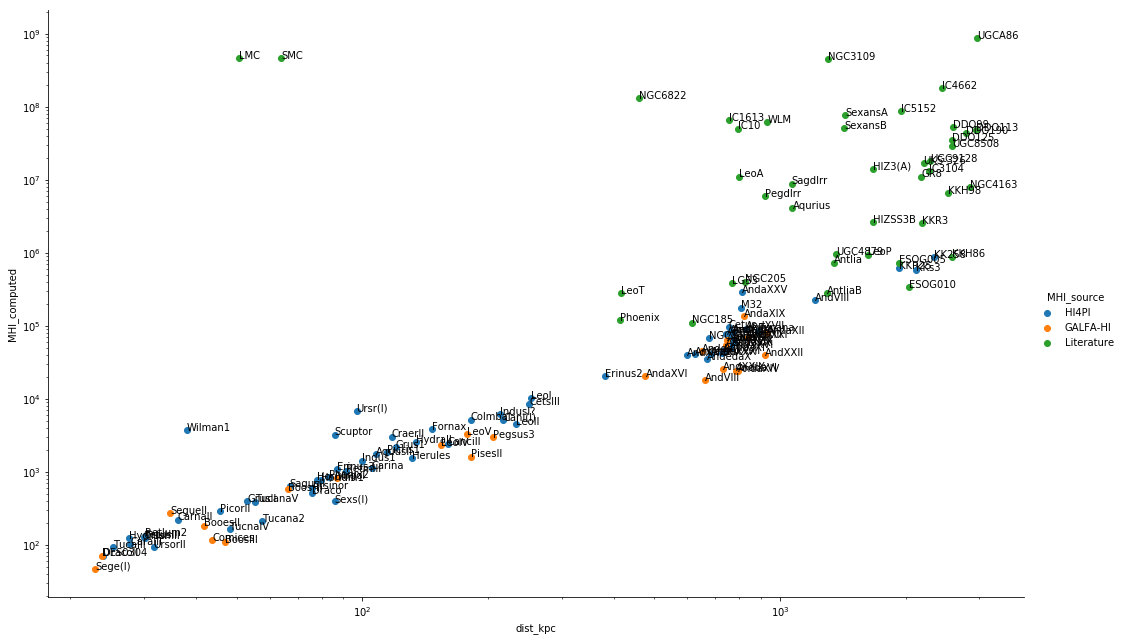

In [74]:
#log log with labels
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
count = 0
for i, txt in enumerate(gals_merged.GalaxyName):
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
                count = count + 1
            else:
                label = txt
                count = count + 1
            plt.annotate(label,(gals_merged.dist_kpc.iat[i],gals_merged.MHI_computed.iat[i]))
plt.show()

In [75]:
print(count)

135


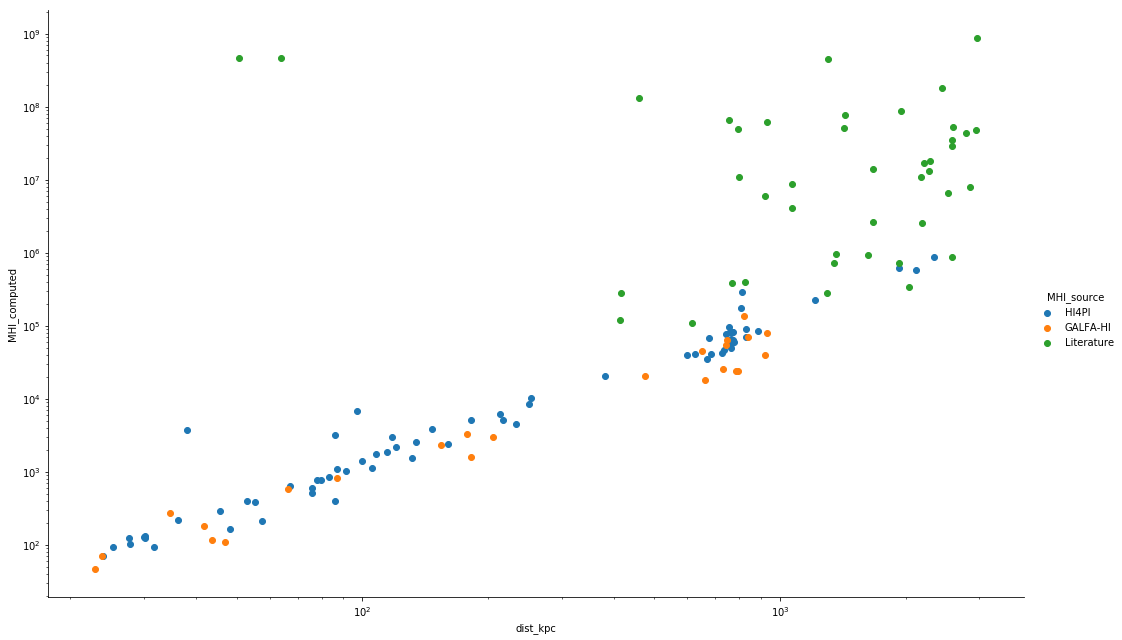

In [76]:
#log log without labels
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
#for i, txt in enumerate(gals_merged.GalaxyName):
#    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
#            if (len(txt) > 7):
#                label = txt[0:3]+txt[-4:]
#            else:
#                label = txt
#            plt.annotate(label,(gals_merged.dist_kpc.iat[i],gals_merged.MHI_computed.iat[i]))
plt.show()


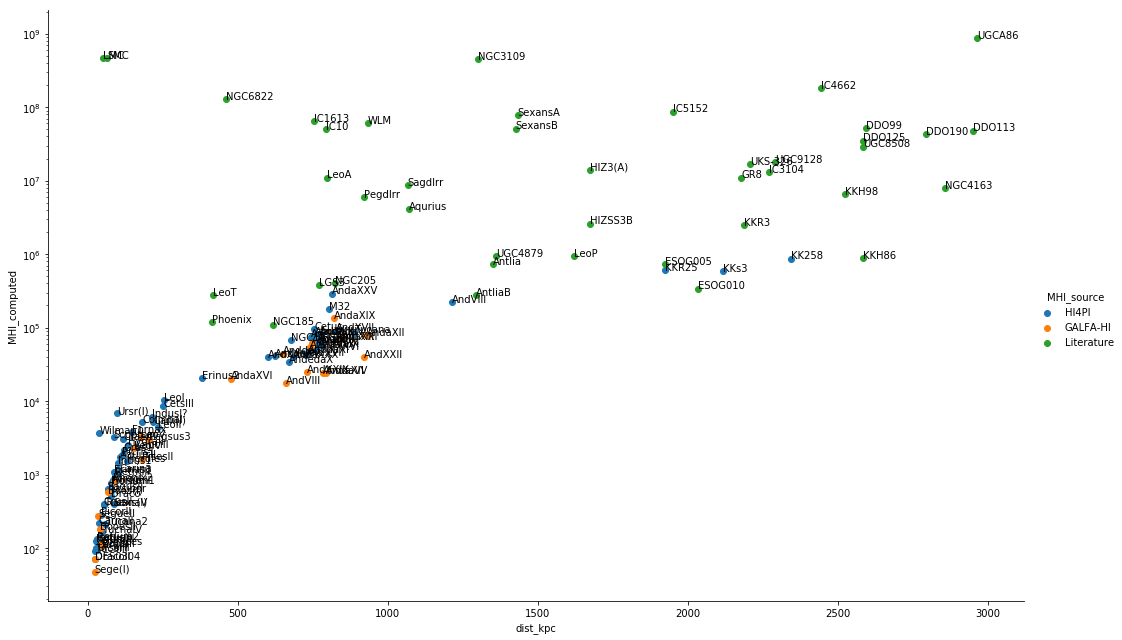

In [77]:
#linear log with labels
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
for i, txt in enumerate(gals_merged.GalaxyName):
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged.dist_kpc.iat[i],gals_merged.MHI_computed.iat[i]))
plt.show()

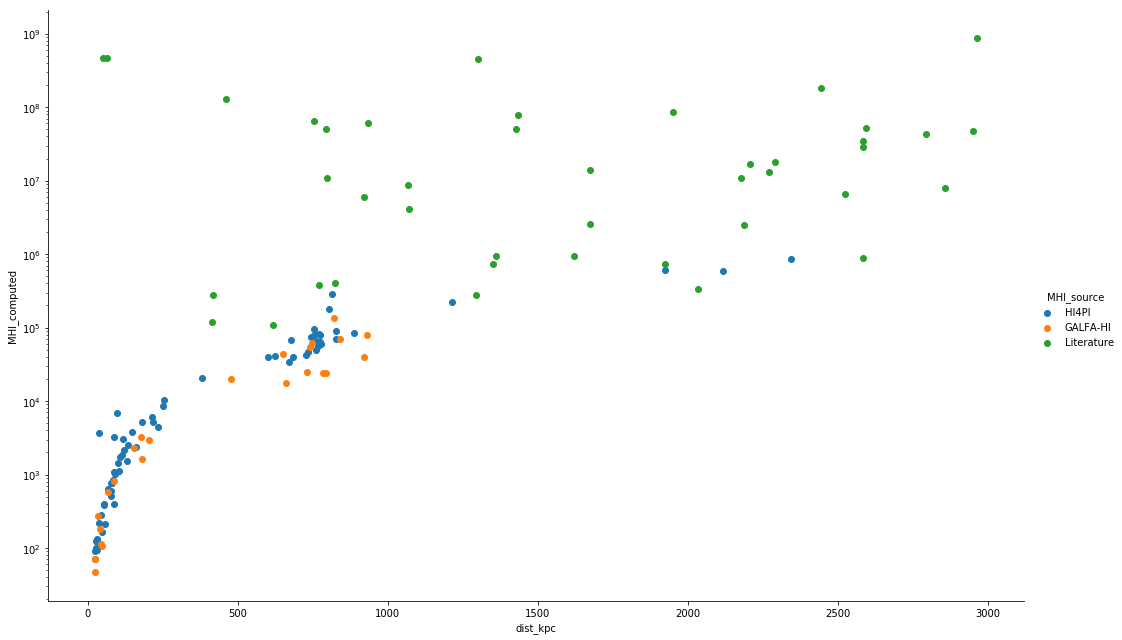

In [78]:
#linear log without labels
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
plt.show()

# Plots: Distance vs MHI/M_star (limited to those dwarfs with M_star in McConnachie, N=92)

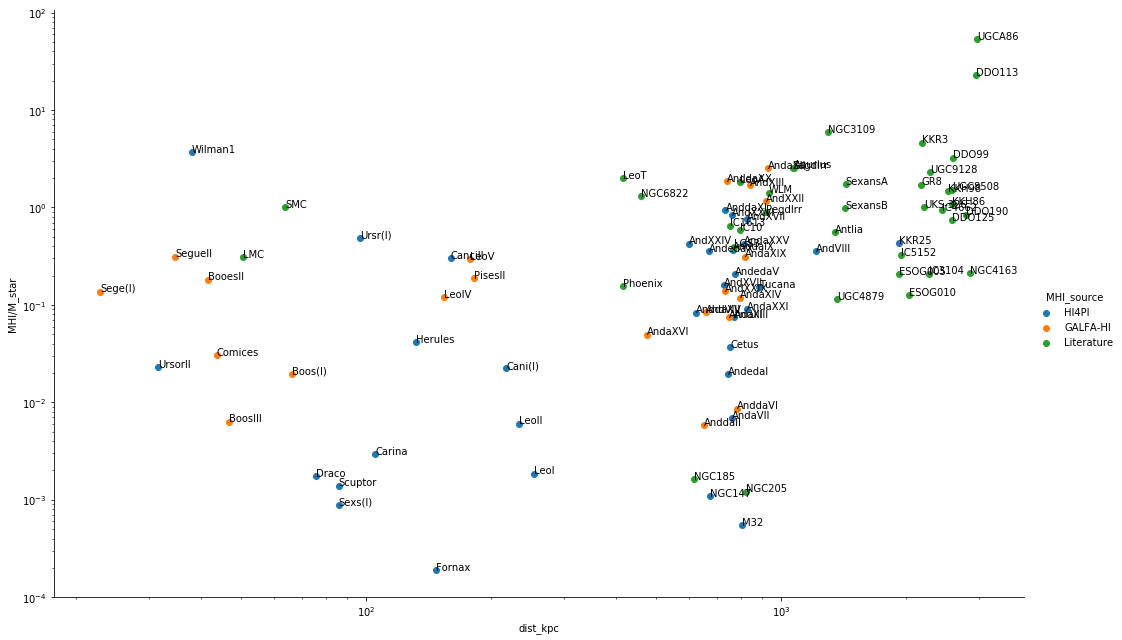

In [79]:
#normalized with labels, log-log scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI/M_star').add_legend()
#print(gals_merged.count())
count = 0
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI/M_star'][i]))):
            count = count + 1
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['dist_kpc'].iat[i],gals_merged['MHI/M_star'].iat[i]))
plt.show()

In [80]:
count

92

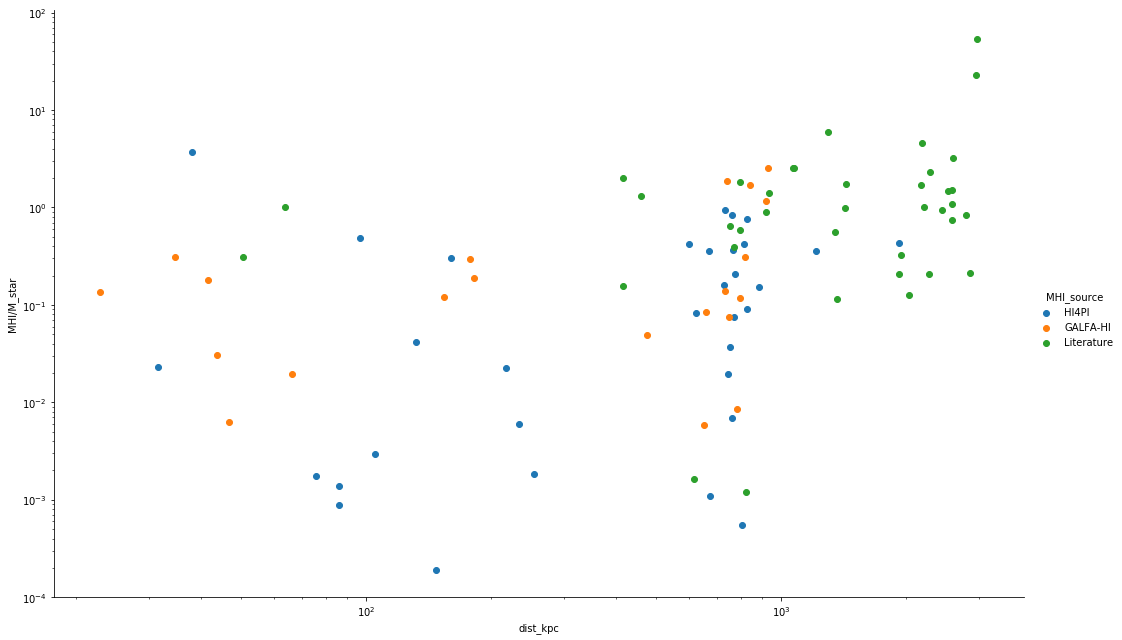

In [81]:
#normalized no labels, log-log scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI/M_star').add_legend()
plt.show()

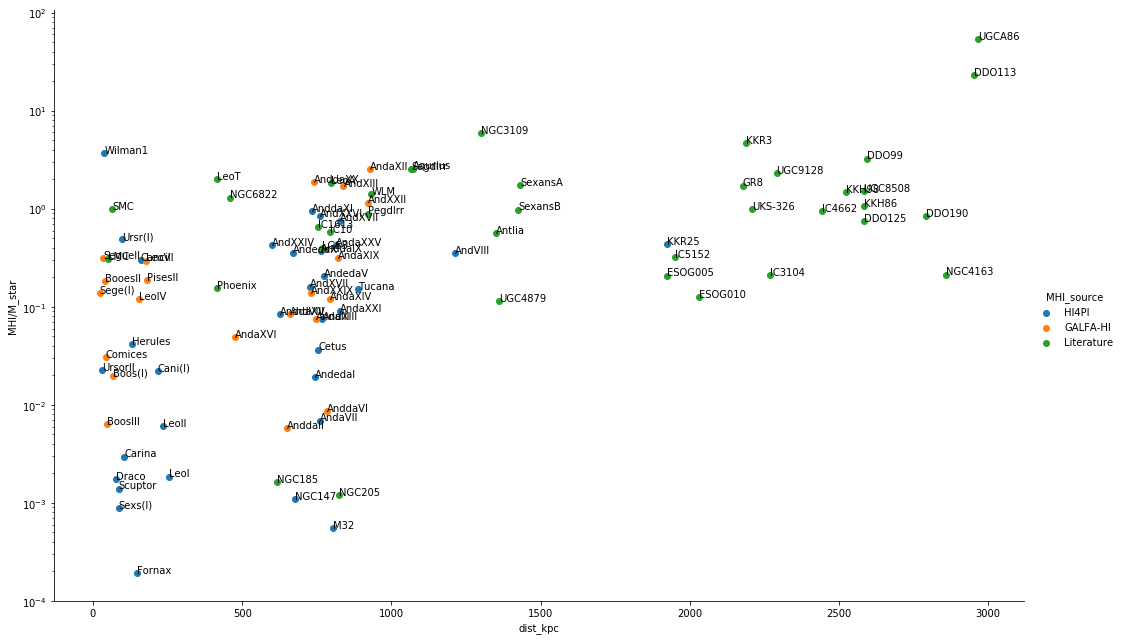

In [82]:
#normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI/M_star').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI/M_star'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['dist_kpc'].iat[i],gals_merged['MHI/M_star'].iat[i]))
plt.show()

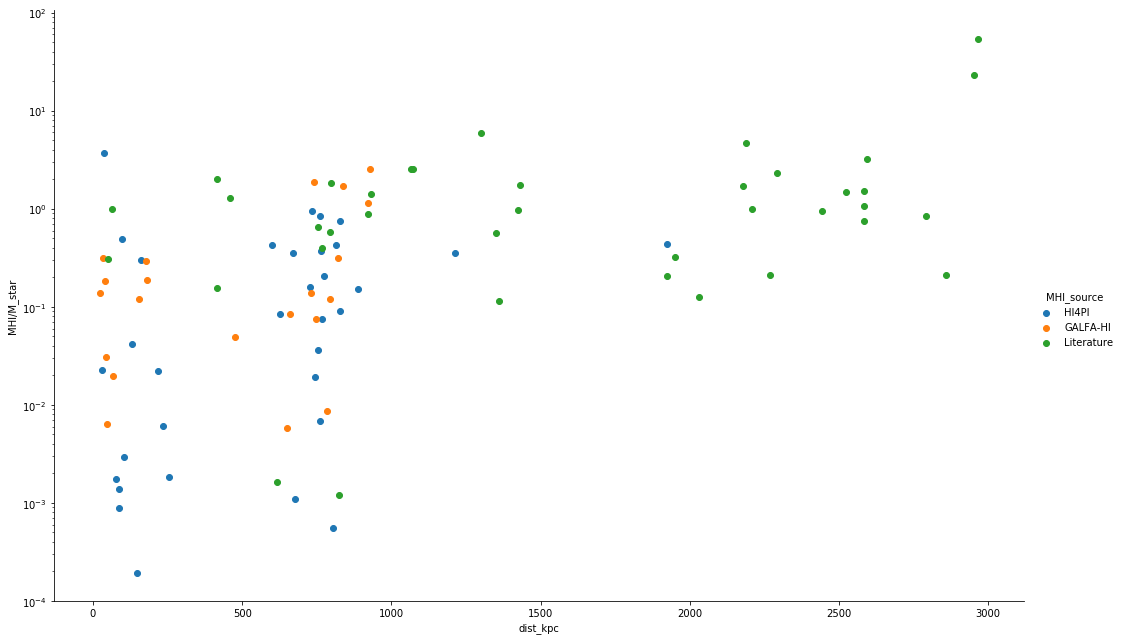

In [83]:
#normalized no labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI/M_star').add_legend()
plt.show()

# Local Group surface distance plots (N=135)

In [84]:
#merge values into master df
#dwarfs_ell = pd.read_csv("./dwarfs_ell_orbits.csv" ,header=(0))
#gals_merged = pd.merge(gals_merged, dwarfs_ell[['GalaxyName','r_ell_m1.2_rs15', 'ell_surf_dist_m1.2_rs15',
#       'r_ell_m1.0_rs20', 'ell_surf_dist_m1.0_rs20', 'r_ell_m1.5_rs15',
#       'ell_surf_dist_m1.5_rs15', 'r_ell_m1.0_rs25', 'ell_surf_dist_m1.0_rs25',
#       'r_ell_m1.0_rs15', 'ell_surf_dist_m1.0_rs15', 'r_ell_m1.5_rs20',
#       'ell_surf_dist_m1.5_rs20', 'r_ell_m1.5_rs25', 'ell_surf_dist_m1.5_rs25',
#       'r_ell_m1.2_rs25', 'ell_surf_dist_m1.2_rs25', 'r_ell_m1.2_rs20',
#       'ell_surf_dist_m1.2_rs20', 'mw_dist', 'm31_dist', 'r_per', 'r_per_err',
#       'r_apo', 'r_apo_err', 'rho_cgm_est', 'rho_cgm_est_err']], how='left', on='GalaxyName')

In [126]:
#THIS CELL FOR NEW MW MODEL FROM ADRIAN
#merge values into master df
dwarfs_ell = pd.read_csv("./dwarfs_ell_new.csv" ,header=(0))
gals_merged = pd.merge(gals_merged, dwarfs_ell[['GalaxyName','r_ell', 'ell_surf_dist','mw_dist', 'm31_dist']], how='left', on='GalaxyName')

KeyError: "['r_per', 'rho_cgm_est', 'r_apo', 'r_apo_err', 'r_per_err', 'rho_cgm_est_err'] not in index"

In [86]:
#This cell fixes a messed up merge
gals_merged['mw_dist'] = gals_merged['mw_dist_y'] 
gals_merged['m31_dist'] = gals_merged['m31_dist_y'] 
gals_merged['r_ell'] = gals_merged['r_ell_y'] 
gals_merged['ell_surf_dist'] = gals_merged['ell_surf_dist_y'] 

KeyError: 'mw_dist_y'

In [87]:
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'note', 'M-m', 'Notes', 'ra', 'dec', 'vsig_s_upper_limit',
       'orb_pericenter', 'orb_apocenter', 'orb_eccentricity', 'orb_period',
       'orb_period_type', 'dist_pc', 'dist_kpc', 'dist_mpc', 'MHI_computed',
       'MHI_source', 'MHI_type', '1sigma', 'rh_subtable', 'MHI_method', 'npix',
       'GUU', 'GRU', 'HUU', 'HRU', 'GNV', 'HNV', 'LIT', '1sigma_GUU',
       '1sigma_GRU', '1sigma_HUU', '1sigma_HRU', '1sigma_GNV', '1sigma_HNV',
       'M_star', 'M_dyn_r_h', 'm-M_err', 'Vmag_err', 'vsig_err',
       'MHI_mcconnachie', 'vsig_g_err', 

In [88]:
#Some renaming
gals_merged.loc[gals_merged['GalaxyName'] == 'IndusI?', 'GalaxyName'] = 'IndusII'
gals_merged.loc[gals_merged['GalaxyName'] == 'Indus1', 'GalaxyName'] = 'IndusI'

In [89]:
#add column which is min mw dist or m31 dist
gals_merged['min_dist_mw_or_m31'] = np.nan
gals_merged['Closer_MW_M31'] = np.nan
for i in range(len(gals_merged)):
    print(gals_merged['GalaxyName'][i],min(gals_merged['mw_dist'][i],gals_merged['m31_dist'][i]),gals_merged['mw_dist'][i],gals_merged['m31_dist'][i])
    gals_merged['min_dist_mw_or_m31'][i] = min(gals_merged['mw_dist'][i],gals_merged['m31_dist'][i])
    if(gals_merged['mw_dist'][i] < gals_merged['m31_dist'][i]):
        gals_merged['Closer_MW_M31'][i] = 'MW'
    elif(gals_merged['mw_dist'][i] > gals_merged['m31_dist'][i]):
        gals_merged['Closer_MW_M31'][i] = 'M31'

#TheGalaxy nan nan nan
#*CanisMajor nan nan nan
SagittariusdSph 18.422410659855245 18.422410659855245 786.9893232008902
TucanaIII 23.286454074572283 23.286454074572283 783.8326858955157
DracoII 26.199691455978176 26.199691455978176 770.2616026885111
Segue(I) 27.892321264551317 27.892321264551317 787.9720949392586


/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Reticulum2 31.663735894087907 31.663735894087907 785.9287546746663
CetusII 32.540763174908435 32.540763174908435 763.7548925235492
TriangulumII 36.562203409408525 36.562203409408525 750.3912269210847
UrsaMajorII 37.92701153489963 37.92701153489963 766.6608801849446
BootesII 39.48105872953528 39.48105872953528 802.559758356636
SegueII 40.75497781339583 40.75497781339583 748.9807761554376
Willman1 42.8508965203957 42.8508965203957 776.2304984992603
ComaBerenices 44.859187695166796 44.859187695166796 798.2429702735473
TucanaIV 45.56770474070074 45.56770474070074 789.3892806591396
BootesIII 45.788988891523935 45.788988891523935 796.0456457642613
GrusII 48.36965635432141 48.36965635432141 784.2695078691785
LMC 50.21223151562807 50.21223151562807 806.377038985792
TucanaV 52.05265391508568 52.05265391508568 794.9159297243599
Tucana2 53.72355915842535 53.72355915842535 792.3837319452168
SagittariusII 59.898601120137215 59.898601120137215 784.3329275575227
SMC 61.33335457612916 61.3333545761291

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


NGC205 45.9339962761451 828.1245265842053 45.9339962761451
AndromedaI 55.41448211268954 748.7238656759273 55.41448211268954
AndromedaXVII 66.45885781302664 731.7798431158176 66.45885781302664
AndromedaXXVII 76.85764106523405 831.9765970253278 76.85764106523405
AndromedaIII 73.03775990457883 751.8574558346219 73.03775990457883
AndromedaXXV 90.1905370433817 816.7524348119017 90.1905370433817
AndromedaXXVI 101.57666854836708 765.9014617762692 101.57666854836708
AndromedaV 108.84272467512163 777.4449073893646 108.84272467512163
AndromedaXI 108.50015720712128 738.3651040097203 108.50015720712128
AndromedaXIX 115.21287642163914 823.569939373222 115.21287642163914
AndromedaXXIII 125.60122790382326 774.1494641014351 125.60122790382326
AndromedaXX 128.09612729926886 744.2285037912893 128.09612729926886
AndromedaXIII 133.7475840660747 843.415112582617 133.7475840660747
AndromedaX 129.98827643628394 674.5323961197914 129.98827643628394
AndromedaXXI 135.16916048461684 830.9044466302299 135.1691604

In [90]:
gals_merged[gals_merged['Closer_MW_M31'] == 'M31']

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,M_V,MHI/M_V,L_V,MHI/L_V,r_ell,ell_surf_dist,mw_dist,m31_dist,min_dist_mw_or_m31,Closer_MW_M31
50,#Andromeda,0.0,42.0,44.3,41.0,16.0,9.0,0.684,24.47,0.07,...,75.43,NaN,5.754399e-29,NaN,335.711080,-295.352016,787.458708,4.429647,4.429647,M31
51,M32,0.0,42.0,41.8,40.0,51.0,55.0,0.154,24.53,0.21,...,-16.43,-1.075489e+04,3.191538e+08,0.000554,357.968018,-285.738091,809.392652,26.961927,26.961927,M31
52,AndromedaIX,0.0,52.0,53.0,43.0,11.0,45.0,0.075,24.42,0.07,...,-8.12,-6.814609e+03,1.513561e+05,0.365592,332.219434,-262.963178,769.910207,38.657982,38.657982,M31
53,NGC205,0.0,40.0,22.1,41.0,41.0,7.0,0.085,24.58,0.07,...,-16.48,-2.427184e+04,3.341950e+08,0.001197,377.126326,-278.900977,828.124527,45.933996,45.933996,M31
54,AndromedaI,0.0,45.0,39.8,38.0,2.0,28.0,0.053,24.36,0.07,...,-11.86,-6.365110e+03,4.742420e+06,0.015918,317.735250,-259.884808,748.723866,55.414482,55.414482,M31
55,AndromedaXVII,0.0,37.0,7.0,44.0,19.0,20.0,0.074,24.31,0.11,...,-8.51,-4.910980e+03,2.167704e+05,0.192796,300.385250,-263.939236,731.779843,66.458858,66.458858,M31
56,AndromedaXXVII,0.0,37.0,27.1,45.0,23.0,13.0,0.080,24.59,0.12,...,-7.89,-1.153863e+04,1.224616e+05,0.743415,413.067418,-227.555782,831.976597,76.857641,76.857641,M31
57,AndromedaIII,0.0,35.0,33.8,36.0,29.0,52.0,0.056,24.37,0.07,...,-10.17,-6.142256e+03,1.000000e+06,0.062467,345.754537,-237.771615,751.857456,73.037760,73.037760,M31
58,AndromedaXXV,0.0,30.0,8.9,46.0,51.0,7.0,0.101,24.55,0.12,...,-9.75,-2.969746e+04,6.792036e+05,0.426308,429.184954,-207.011548,816.752435,90.190537,90.190537,M31
59,AndromedaXXVI,0.0,23.0,45.6,47.0,54.0,58.0,0.110,24.41,0.12,...,-7.11,-7.038601e+03,5.970353e+04,0.838216,409.193726,-202.450397,765.901462,101.576669,101.576669,M31


In [91]:
import re
txt = 'AndromedaXXIV'
print(txt.split('Andromeda'))


['', 'XXIV']


/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


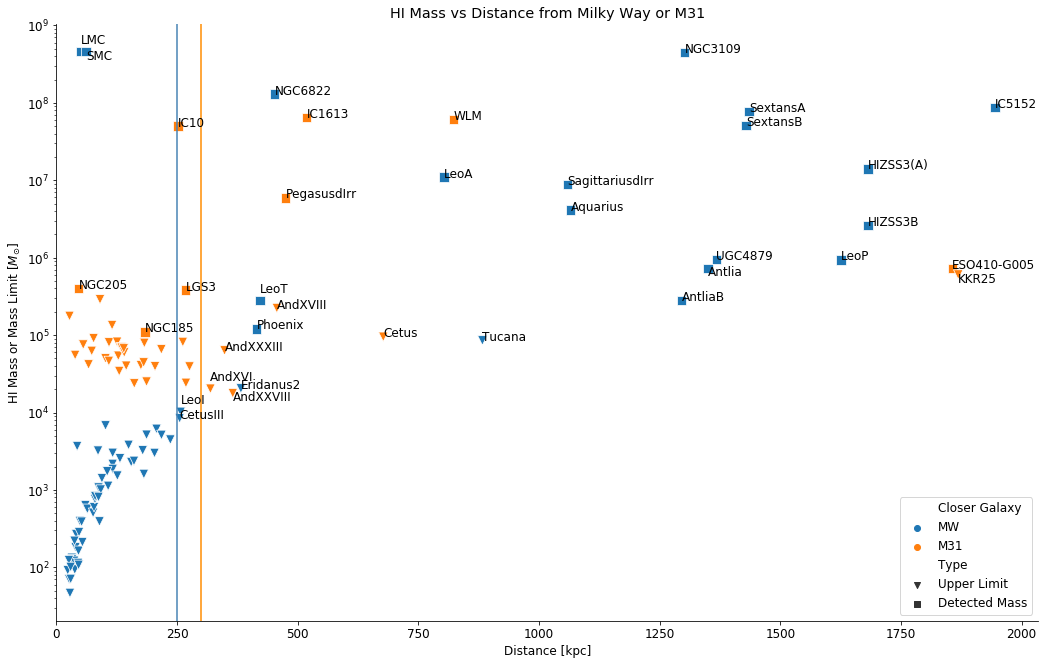

In [92]:
#Full range of D, MHI_computed vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df.reset_index(drop=True, inplace=True)
label=[]


plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df['min_dist_mw_or_m31'], y=plot_df['MHI_computed'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    if((((plot_df['Closer Galaxy'][i] == 'M31') & (plot_df['min_dist_mw_or_m31'][i] > 300)) | ((plot_df['Closer Galaxy'][i] == 'MW') & (plot_df['min_dist_mw_or_m31'][i] > 250)) | (plot_df['Type'][i] == 'Detected Mass') | (plot_df['MHI_computed'][i] > 1000000))):
        if ('Andromeda' in txt):
            roman = txt.split('Andromeda')
            roman = ''.join(roman)
            label = "And" + roman
        else:
            label = txt
        if (txt in ['AndromedaXXVIII','SMC','Antlia','KKR25']):
            label_x = plot_df['min_dist_mw_or_m31'].iat[i]
            label_y = plot_df['MHI_computed'].iat[i] - (plot_df['MHI_computed'].iat[i]*.2)
        elif (txt in ['LMC','LeoT','LeoI','AndromedaXVI']):
            label_x = plot_df['min_dist_mw_or_m31'].iat[i]
            label_y = plot_df['MHI_computed'].iat[i] + (plot_df['MHI_computed'].iat[i]*.27)
        else:
            label_x = plot_df['min_dist_mw_or_m31'].iat[i]
            label_y = plot_df['MHI_computed'].iat[i]
        plt.annotate(label,(label_x,label_y))

plt.xlim(0, 2035)
plt.axvline(250,color='steelblue')
plt.axvline(300,color='darkorange')

plt.title("HI Mass vs Distance from Milky Way or M31")
plt.ylabel("HI Mass or Mass Limit [$M_{\odot}$]")
plt.xlabel("Distance [kpc]")
plt.show()

In [93]:
for i, txt in enumerate(gals_merged.GalaxyName):
    if('Hyd' in txt):
        print(txt)

HydraII
HydrusI


/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


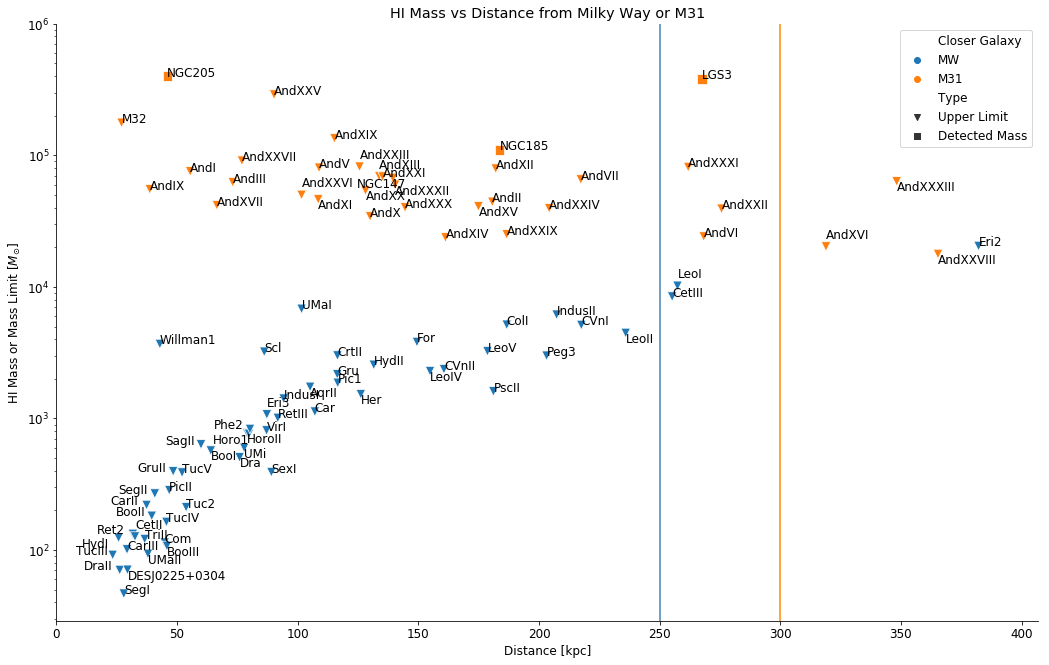

In [94]:
#Zoomed in D, MHI_computed vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[((gals_merged['mw_dist'] < 400) | (gals_merged['m31_dist'] < 400)) & (gals_merged['MHI_computed'] < 1000000)]
plot_df.reset_index(drop=True, inplace=True)
label=[]


plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df['min_dist_mw_or_m31'], y=plot_df['MHI_computed'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    if ('Andromeda' in txt):
        roman = txt.split('Andromeda')
        roman = ''.join(roman)
        label = "And" + roman
    elif ('Sag' in txt):
        tag = re.findall(r"dSph",txt) + re.findall(r"II",txt) + re.findall(r"dIrr",txt)
        tag = ''.join(tag)
        label = "Sag" + tag
    elif ('Tuc' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"V",txt) + re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tuc" + tag
    elif ('Horo' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "Horo" + tag
    elif ('Retic' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Ret" + tag
    elif ('UrsaMajor' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "UMa" + tag
    elif ('Bootes' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "Boo" + tag
    elif ('Carina' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Car" + tag
    elif ('Segue' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Seg" + tag
    elif ('Hydr' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Hyd" + tag
    elif ('Cetus' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Cet" + tag
    elif ('Triangulum' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tri" + tag
    elif ('ComaBerenices' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Com" + tag
    elif ('UrsaMinor' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "UMi" + tag
    elif ('Pisces' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Psc" + tag
    elif ('Pictor' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Pic" + tag
    elif ('Eridan' in txt):
        tag =  re.findall(r"3",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Eri" + tag
    elif ('Hercules' in txt):
        tag =  re.findall(r"3",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Her" + tag
    elif ('CanesVenatici' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "CVn" + tag
    elif ('Columba' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Col" + tag
    elif ('Pegasus' in txt):
        tag =  re.findall(r"3",txt)+re.findall(r"dIrr",txt)
        tag = ''.join(tag)
        label = "Peg" + tag
    elif ('Draco' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Dra" + tag
    elif ('Phoenix' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Phe" + tag
    elif ('Sextans' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"A",txt)+re.findall(r"B",txt)
        tag = ''.join(tag)
        label = "Sex" + tag
    elif ('Tucana' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"V",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tuc" + tag
    elif ('Virgo' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Vir" + tag
    elif ('Aquarius' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Aqr" + tag
    elif ('Sculptor' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Scl" + tag
    elif ('Crater' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Crt" + tag
    elif ('Fornax' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "For" + tag
    elif ('Grus' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Gru" + tag
    else:
        label = txt
    if (txt in ['AndromedaXXVIII','SMC','Antlia','KKR25','AndromedaXXXII','AndromedaXX','AndromedaXI','AndromedaXXXIII','LeoII','LeoIV','Hercules','AquariusII','DESJ0225+0304','Tucana','Draco','Bootes(I)','HorologiumII','UrsaMajorII','AndromedaXV','BootesIII','UrsaMinor']):
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]
        label_y = plot_df['MHI_computed'].iat[i] - (plot_df['MHI_computed'].iat[i]*.15)
    elif (txt in ['AndromedaXIII','LMC','LeoT','LeoI','AndromedaXVI','AndromedaXXIII','AndromedaXXVI','Eridanus3','CetusII']):
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]
        label_y = plot_df['MHI_computed'].iat[i] + (plot_df['MHI_computed'].iat[i]*.15)
    elif (txt in ['GrusII','SegueII','TucanaIII','SagittariusII','DracoII','CarinaII','Reticulum2','BootesII','Phoenix2','AndromedaXX',]):
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]-15
        label_y = plot_df['MHI_computed'].iat[i]
    elif (txt in ['HydrusI','Horologium1','NGC147','AndromedaXX']):
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]-15
        label_y = plot_df['MHI_computed'].iat[i]-(plot_df['MHI_computed'].iat[i]*.15)
    else:
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]
        label_y = plot_df['MHI_computed'].iat[i]
    plt.annotate(label,(label_x,label_y))

plt.xlim(0, 407)
plt.ylim(0, 1000000)
plt.axvline(250,color='steelblue')
plt.axvline(300,color='darkorange')

plt.title("HI Mass vs Distance from Milky Way or M31")
plt.ylabel("HI Mass or Mass Limit [$M_{\odot}$]")
plt.xlabel("Distance [kpc]")
plt.show()

In [95]:
list(gals_merged.columns)

['GalaxyName',
 'RA_hr',
 'RA_min',
 'RA_sec',
 'Dec_deg',
 'Dec_arcmin',
 'Dec_arcsec',
 'EB-V',
 'm-M',
 'm-M_err_pos',
 'm-M_err_neg',
 'vh(km/s)',
 'Vmag',
 'Vmag_err_pos',
 'Vmag_err_neg',
 'PA',
 'e=1-b/a',
 'muVo',
 "rh(')",
 'rh_err_pos',
 'rh_err_neg',
 'vsig_s',
 'vsig_err_pos',
 'vsig_err_neg',
 'vrot_s',
 'vrot_s_err_pos',
 'vrot_s_err_neg',
 'MHI',
 'Data',
 'Key',
 'vsig_g',
 'vsig_g_err_pos',
 'vsig_g_err_neg',
 'vrot_g',
 'note',
 'M-m',
 'Notes',
 'ra',
 'dec',
 'vsig_s_upper_limit',
 'orb_pericenter',
 'orb_apocenter',
 'orb_eccentricity',
 'orb_period',
 'orb_period_type',
 'dist_pc',
 'dist_kpc',
 'dist_mpc',
 'MHI_computed',
 'MHI_source',
 'MHI_type',
 '1sigma',
 'rh_subtable',
 'MHI_method',
 'npix',
 'GUU',
 'GRU',
 'HUU',
 'HRU',
 'GNV',
 'HNV',
 'LIT',
 '1sigma_GUU',
 '1sigma_GRU',
 '1sigma_HUU',
 '1sigma_HRU',
 '1sigma_GNV',
 '1sigma_HNV',
 'M_star',
 'M_dyn_r_h',
 'm-M_err',
 'Vmag_err',
 'vsig_err',
 'MHI_mcconnachie',
 'vsig_g_err',
 'M_dyn',
 'M_dyn_calcu

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


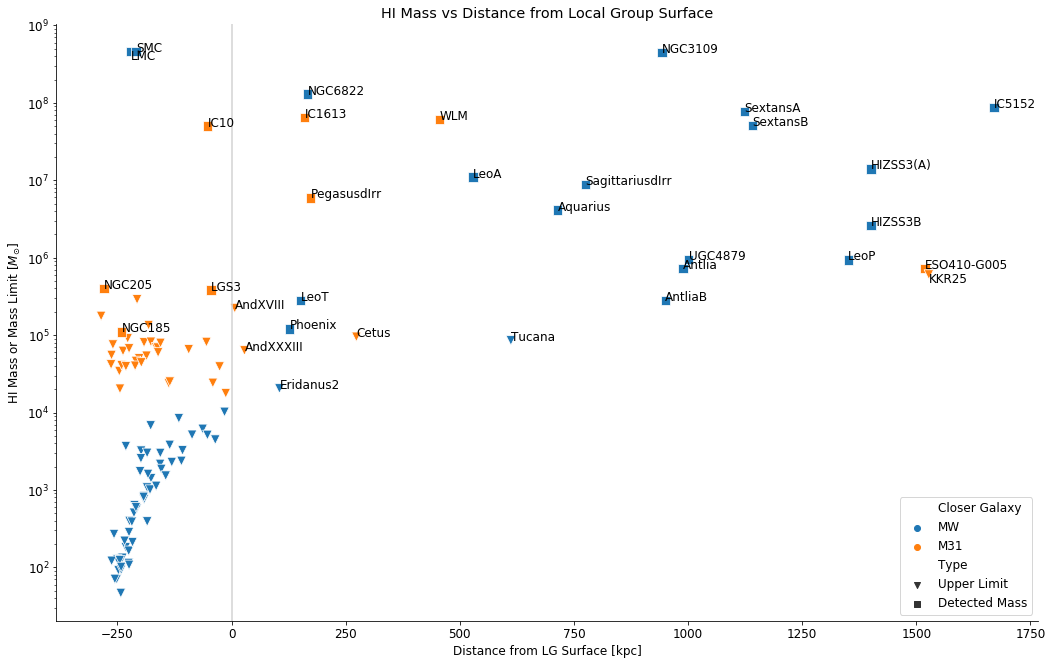

In [96]:
#MHI_computed vs Distance to LG surface

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df.reset_index(drop=True, inplace=True)
label=[]

LG_model = 'ell_surf_dist'

plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df[LG_model], y=plot_df['MHI_computed'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    if((plot_df[LG_model][i] > 0) | (plot_df['Type'][i] == 'Detected Mass') | (plot_df['MHI_computed'][i] > 1000000)):
        if ('Andromeda' in txt):
            roman = txt.split('Andromeda')
            roman = ''.join(roman)
            label = "And" + roman
        else:
            label = txt
        if (txt in ['LMC','KKR25']):
            label_x = plot_df[LG_model].iat[i]
            label_y = plot_df['MHI_computed'].iat[i] - (plot_df['MHI_computed'].iat[i]*.2)
        elif (txt in []):
            label_x = plot_df[LG_model].iat[i]
            label_y = plot_df['MHI_computed'].iat[i] + (plot_df['MHI_computed'].iat[i]*.27)
        else:
            label_x = plot_df[LG_model].iat[i]
            label_y = plot_df['MHI_computed'].iat[i]
        plt.annotate(label,(label_x,label_y))

#plt.xlim(0, 2035)
#plt.axvline(250,color='steelblue')
#plt.axvline(300,color='darkorange')
plt.axvline(0,color='lightgray')

plt.title("HI Mass vs Distance from Local Group Surface")
plt.ylabel("HI Mass or Mass Limit [$M_{\odot}$]")
plt.xlabel("Distance from LG Surface [kpc]")
plt.show()

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


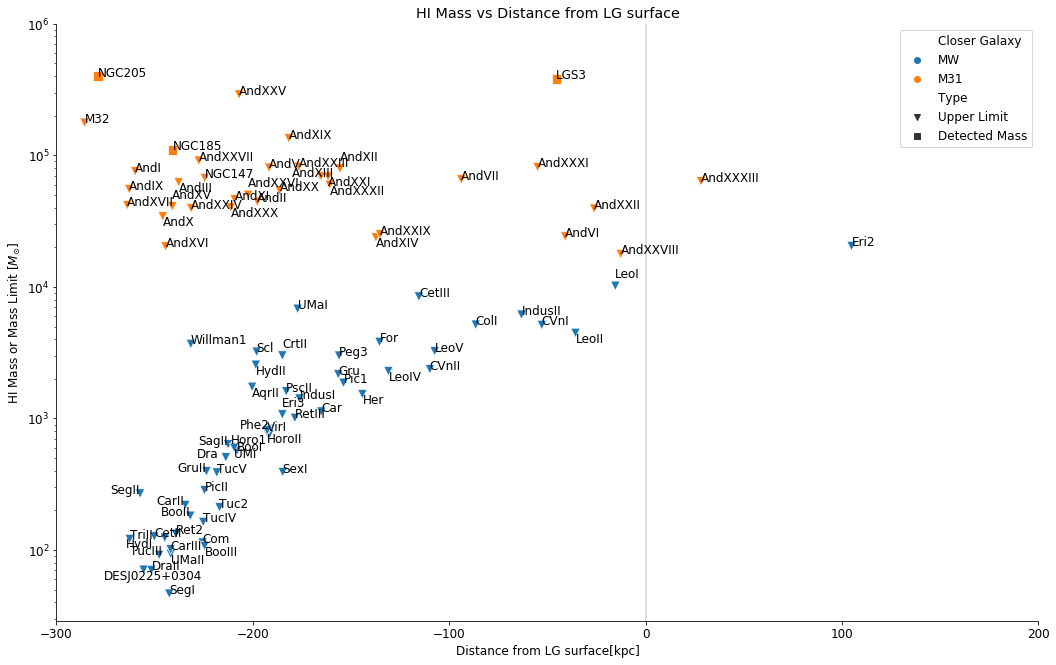

In [97]:
#Zoomed in D, MHI_computed vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

#plot_df = gals_merged
plot_df = gals_merged[((gals_merged['mw_dist'] < 400) | (gals_merged['m31_dist'] < 400)) & (gals_merged['MHI_computed'] < 1000000)]
plot_df.reset_index(drop=True, inplace=True)
label=[]

LG_model = 'ell_surf_dist'


plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df[LG_model], y=plot_df['MHI_computed'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    if ('Andromeda' in txt):
        roman = txt.split('Andromeda')
        roman = ''.join(roman)
        label = "And" + roman
    elif ('Sag' in txt):
        tag = re.findall(r"dSph",txt) + re.findall(r"II",txt) + re.findall(r"dIrr",txt)
        tag = ''.join(tag)
        label = "Sag" + tag
    elif ('Tuc' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"V",txt) + re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tuc" + tag
    elif ('Horo' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "Horo" + tag
    elif ('Retic' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Ret" + tag
    elif ('UrsaMajor' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "UMa" + tag
    elif ('Bootes' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "Boo" + tag
    elif ('Carina' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Car" + tag
    elif ('Segue' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Seg" + tag
    elif ('Hydr' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Hyd" + tag
    elif ('Cetus' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Cet" + tag
    elif ('Triangulum' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tri" + tag
    elif ('ComaBerenices' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Com" + tag
    elif ('UrsaMinor' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "UMi" + tag
    elif ('Pisces' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Psc" + tag
    elif ('Pictor' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Pic" + tag
    elif ('Eridan' in txt):
        tag =  re.findall(r"3",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Eri" + tag
    elif ('Hercules' in txt):
        tag =  re.findall(r"3",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Her" + tag
    elif ('CanesVenatici' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "CVn" + tag
    elif ('Columba' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Col" + tag
    elif ('Pegasus' in txt):
        tag =  re.findall(r"3",txt)+re.findall(r"dIrr",txt)
        tag = ''.join(tag)
        label = "Peg" + tag
    elif ('Draco' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Dra" + tag
    elif ('Phoenix' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Phe" + tag
    elif ('Sextans' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"A",txt)+re.findall(r"B",txt)
        tag = ''.join(tag)
        label = "Sex" + tag
    elif ('Tucana' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"V",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tuc" + tag
    elif ('Virgo' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Vir" + tag
    elif ('Aquarius' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Aqr" + tag
    elif ('Sculptor' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Scl" + tag
    elif ('Crater' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Crt" + tag
    elif ('Fornax' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "For" + tag
    elif ('Grus' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Gru" + tag
    else:
        label = txt
    if (txt in ['AndromedaXIV','AndromedaXXI','AndromedaX','AndromedaIII','AndromedaXXX','AndromedaXXXII','HydraII','SMC','Antlia','KKR25','LeoII','LeoIV','Hercules','AquariusII','Tucana','HorologiumII','UrsaMajorII','BootesIII','UrsaMinor']):
        label_x = plot_df[LG_model].iat[i]
        label_y = plot_df['MHI_computed'].iat[i] - (plot_df['MHI_computed'].iat[i]*.15)
    elif (txt in ['AndromedaXV','AndromedaXXVI','AndromedaXII','CraterII','LMC','LeoT','LeoI','Eridanus3']):
        label_x = plot_df[LG_model].iat[i]
        label_y = plot_df['MHI_computed'].iat[i] + (plot_df['MHI_computed'].iat[i]*.15)
    elif (txt in ['AndromedaXIII','Draco','GrusII','SegueII','TucanaIII','SagittariusII','CarinaII','BootesII','Phoenix2']):
        label_x = plot_df[LG_model].iat[i]-15
        label_y = plot_df['MHI_computed'].iat[i]
    elif (txt in ['HydrusI','Horologium1','DESJ0225+0304']):
        label_x = plot_df[LG_model].iat[i]-20
        label_y = plot_df['MHI_computed'].iat[i]-(plot_df['MHI_computed'].iat[i]*.15)
    else:
        label_x = plot_df[LG_model].iat[i]
        label_y = plot_df['MHI_computed'].iat[i]
    plt.annotate(label,(label_x,label_y))

plt.xlim(-300, 200)
plt.ylim(0, 1000000)
#plt.axvline(250,color='steelblue')
#plt.axvline(300,color='darkorange')
plt.axvline(0,color='lightgray')

plt.title("HI Mass vs Distance from LG surface")
plt.ylabel("HI Mass or Mass Limit [$M_{\odot}$]")
plt.xlabel("Distance from LG surface[kpc]")
plt.show()

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


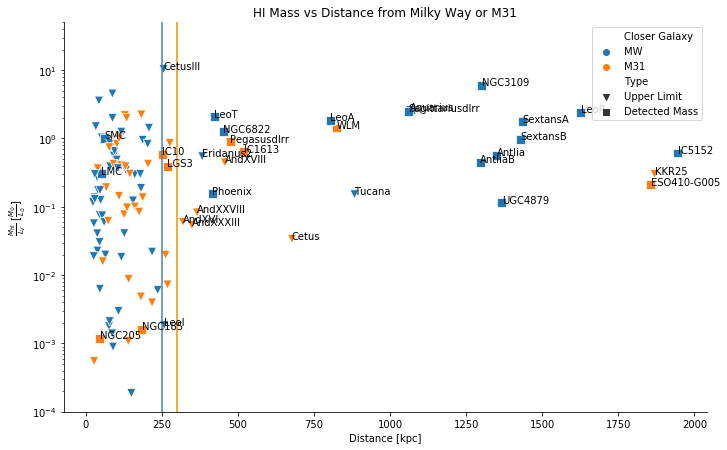

In [98]:
#Full range of D, MHI_computed normalized by L_v vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df.reset_index(drop=True, inplace=True)
label=[]

plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 6,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df['min_dist_mw_or_m31'], y=plot_df['MHI/L_V'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=80)
#print(gals_merged.count())
count = 0
plot_df.reset_index(drop=True, inplace=True)

for i, txt in enumerate(plot_df.GalaxyName):
    if(((plot_df['Closer Galaxy'][i] == 'M31') & (plot_df['min_dist_mw_or_m31'][i] > 300)) | ((plot_df['Closer Galaxy'][i] == 'MW') & (plot_df['min_dist_mw_or_m31'][i] > 250)) | (plot_df['Type'][i] == 'Detected Mass')):
        if ('Andromeda' in txt):
            roman = txt.split('Andromeda')
            roman = ''.join(roman)
            label = "And" + roman
        else:
            label = txt
        
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]
        label_y = plot_df['MHI/L_V'].iat[i]
        if(label_y < 50):
            plt.annotate(label,(label_x,label_y))

plt.ylim(0.0001, 50)

plt.axvline(250,color='steelblue')
plt.axvline(300,color='darkorange')

plt.title("HI Mass vs Distance from Milky Way or M31")
plt.ylabel("$\\frac{M_{HI}}{L_{V}}$ [$\\frac{M_{\odot}}{L_{\odot}}$]")
plt.xlabel("Distance [kpc]")
plt.show()

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


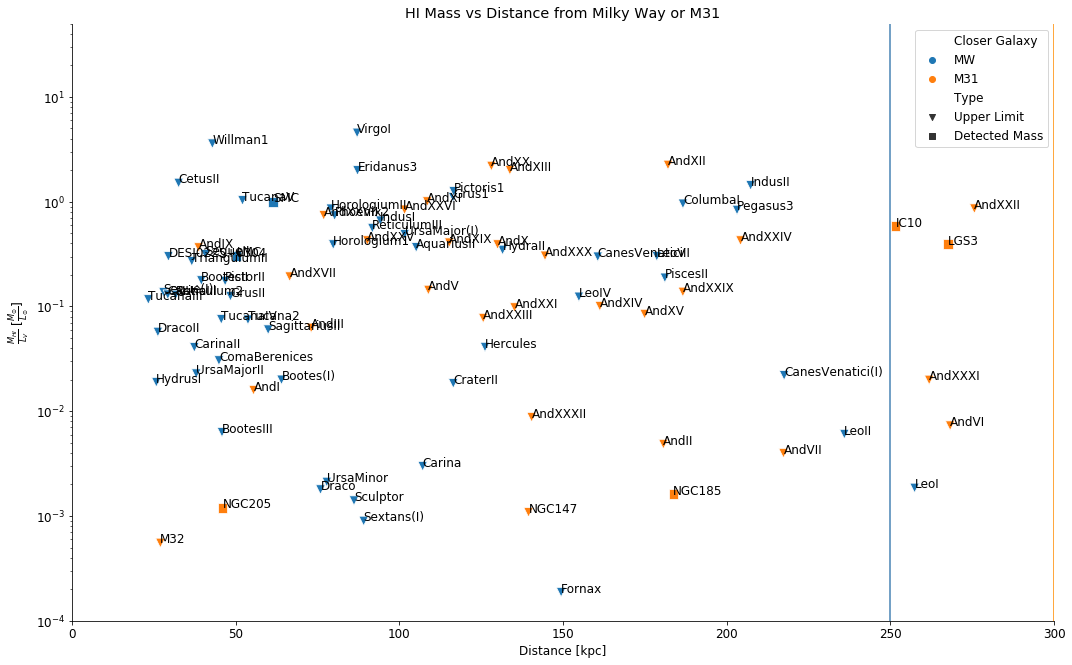

In [99]:
#Zoomed MHI_computed normalized by L_v vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df.reset_index(drop=True, inplace=True)
label=[]

plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)



plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

xlim_up = 300
ylim_up = 10

plot_df = plot_df[(plot_df['min_dist_mw_or_m31'] < 300) & (plot_df['MHI/L_V'] < 10)]
plot_df.reset_index(drop=True, inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height=9, aspect = 1.61)


#fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height=3, aspect=1.61)
#fg = sb.scatterplot(x=plot_df[LG_model], y=plot_df['MHI_computed'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df['min_dist_mw_or_m31'], y=plot_df['MHI/L_V'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
for i, txt in enumerate(plot_df.GalaxyName):
    if(((plot_df['Closer Galaxy'][i] == 'M31') & (plot_df['min_dist_mw_or_m31'][i] > 0)) | ((plot_df['Closer Galaxy'][i] == 'MW') & (plot_df['min_dist_mw_or_m31'][i] > 0)) | (plot_df['Type'][i] == 'Detected Mass')):
        if ('Andromeda' in txt):
            roman = txt.split('Andromeda')
            roman = ''.join(roman)
            label = "And" + roman
        else:
            label = txt
        
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]
        label_y = plot_df['MHI/L_V'].iat[i]
        plt.annotate(label,(label_x,label_y))

plt.ylim(0.0001, 50)
plt.xlim(0,300)

plt.axvline(250,color='steelblue')
plt.axvline(300,color='darkorange')


plt.title("HI Mass vs Distance from Milky Way or M31")
plt.ylabel("$\\frac{M_{HI}}{L_{V}}$ [$\\frac{M_{\odot}}{L_{\odot}}$]")
plt.xlabel("Distance [kpc]")
plt.show()

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


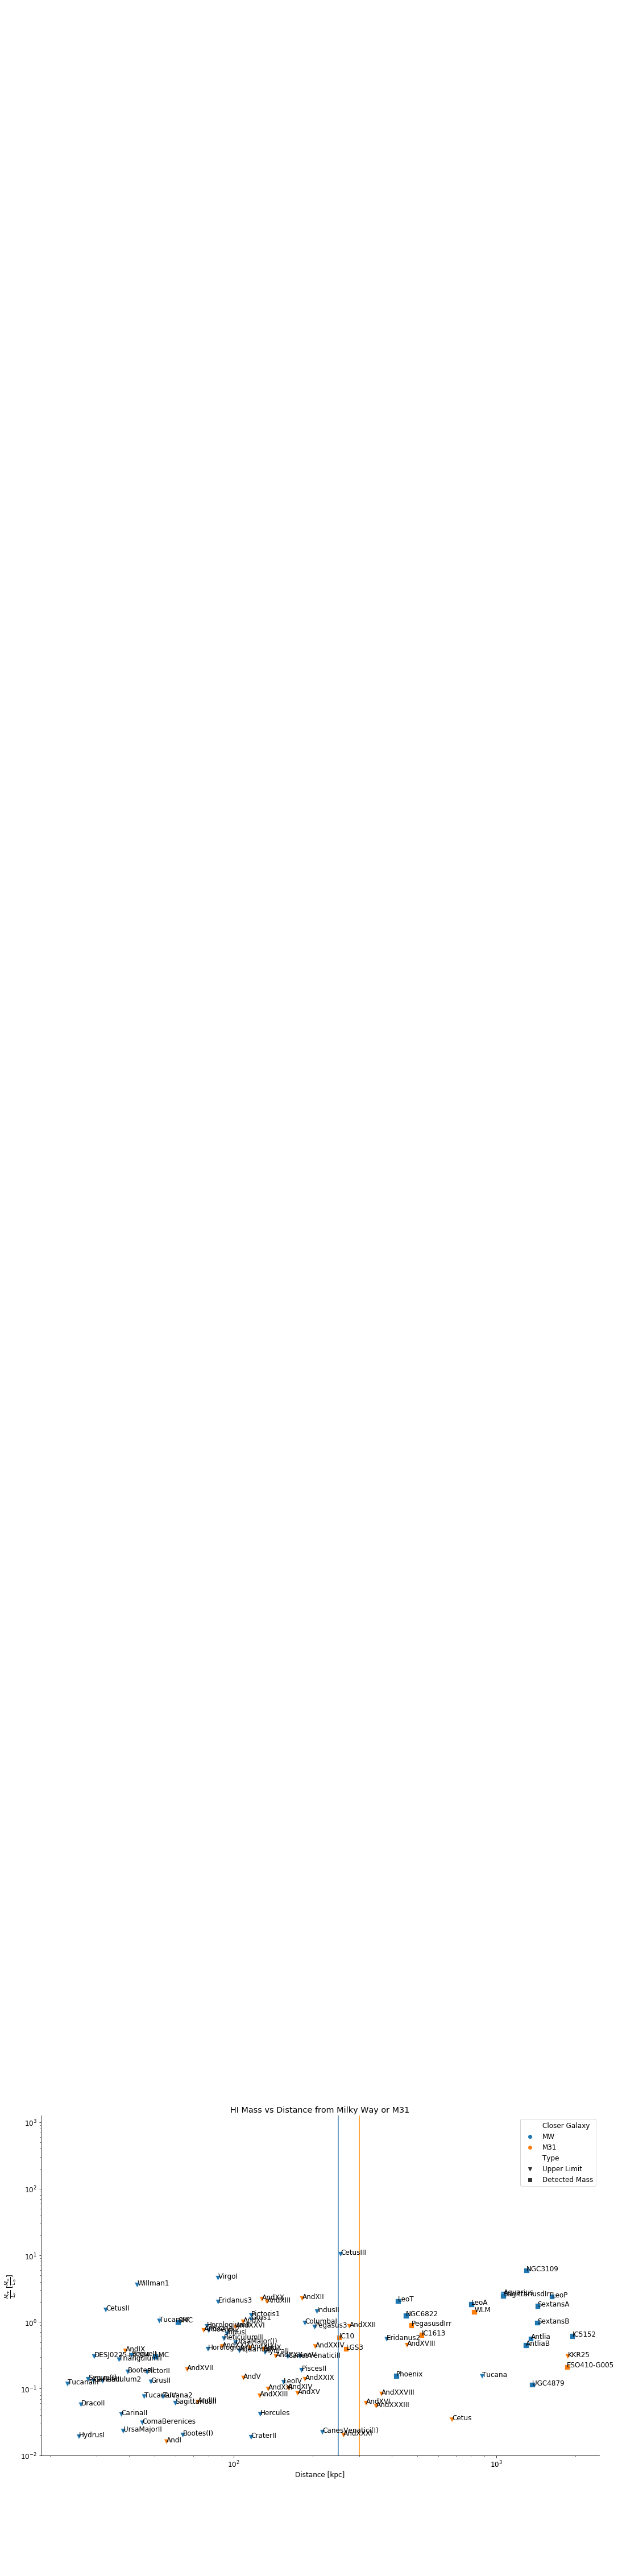

In [100]:
#Full range of D, MHI_computed normalized by L_v vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df.reset_index(drop=True, inplace=True)
label=[]


plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df['min_dist_mw_or_m31'], y=plot_df['MHI/L_V'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    if((plot_df['Type'][i] == 'Upper Limit')|(plot_df['Type'][i] == 'Detected Mass') ):
        if ('Andromeda' in txt):
            roman = txt.split('Andromeda')
            roman = ''.join(roman)
            label = "And" + roman
        else:
            label = txt
        if (txt in []):
            label_x = plot_df['min_dist_mw_or_m31'].iat[i]
            label_y = plot_df['MHI/L_V'].iat[i] - (plot_df['MHI/L_V'].iat[i]*.2)
        elif (txt in []):
            label_x = plot_df['min_dist_mw_or_m31'].iat[i]
            label_y = plot_df['MHI/L_V'].iat[i] + (plot_df['MHI/L_V'].iat[i]*.27)
        else:
            label_x = plot_df['min_dist_mw_or_m31'].iat[i]
            label_y = plot_df['MHI/L_V'].iat[i]
        plt.annotate(label,(label_x,label_y))

plt.ylim(0.01, 1250)
plt.axvline(250,color='steelblue')
plt.axvline(300,color='darkorange')

plt.title("HI Mass vs Distance from Milky Way or M31")
plt.ylabel("$\\frac{M_{HI}}{L_{V}}$ [$\\frac{M_{\odot}}{L_{\odot}}$]")
plt.xlabel("Distance [kpc]")
plt.show()

In [101]:
gals_merged[['GalaxyName','Vmag','L_V','MHI/L_V']]

,GalaxyName,Vmag,L_V,MHI/L_V
0,#TheGalaxy,99.90,9.289664e+01,NaN
1,#*CanisMajor,-0.10,4.875285e+07,NaN
2,SagittariusdSph,3.60,2.147830e+07,NaN
3,TucanaIII,14.60,7.870458e+02,0.116755
4,DracoII,14.00,1.235947e+03,0.057124
5,Segue(I),15.30,3.404082e+02,0.137061
6,Reticulum2,14.70,1.028016e+03,0.129131
7,CetusII,17.40,8.394600e+01,1.510300
8,TriangulumII,15.60,4.487454e+02,0.270515
9,UrsaMajorII,13.30,4.092607e+03,0.022864


/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


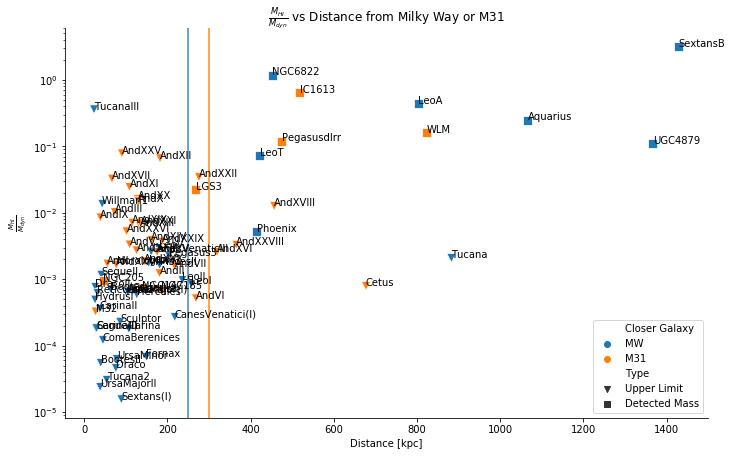

In [102]:
#Full range of D, MHI_computed normalized by M_dyn vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df = gals_merged[gals_merged['MHI/M_dyn'] > 0]
plot_df.reset_index(drop=True, inplace=True)
label=[]

plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 6,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df['min_dist_mw_or_m31'], y=plot_df['MHI/M_dyn'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=80)
#print(gals_merged.count())
count = 0
plot_df.reset_index(drop=True, inplace=True)

for i, txt in enumerate(plot_df.GalaxyName):
    if(((plot_df['Closer Galaxy'][i] == 'M31') & (plot_df['min_dist_mw_or_m31'][i] > 0)) | ((plot_df['Closer Galaxy'][i] == 'MW') & (plot_df['min_dist_mw_or_m31'][i] > 0)) | (plot_df['Type'][i] == 'Detected Mass')):
        if ('Andromeda' in txt):
            roman = txt.split('Andromeda')
            roman = ''.join(roman)
            label = "And" + roman
        else:
            label = txt
        
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]
        label_y = plot_df['MHI/M_dyn'].iat[i]
        plt.annotate(label,(label_x,label_y))

#plt.ylim(0, 50)

plt.axvline(250,color='steelblue')
plt.axvline(300,color='darkorange')

plt.title("$\\frac{M_{HI}}{M_{dyn}}$ vs Distance from Milky Way or M31")
plt.ylabel("$\\frac{M_{HI}}{M_{dyn}}$")
plt.xlabel("Distance [kpc]")
plt.show()

In [103]:
gals_merged[(gals_merged['MHI_type'] != 'detected_mass') & (gals_merged['MHI_type'] != 'upper_limit')]

#53 upper_limits w/d_mw < 300

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,M_V,MHI/M_V,L_V,MHI/L_V,r_ell,ell_surf_dist,mw_dist,m31_dist,min_dist_mw_or_m31,Closer_MW_M31
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,-0.09,NaN,9.289664e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,-14.39,NaN,4.875285e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,-13.50,NaN,2.147830e+07,NaN,458.152945,-251.952763,18.422411,786.989323,18.422411,MW
50,#Andromeda,0.0,42.0,44.3,41.0,16.0,9.0,0.684,24.47,0.07,...,75.43,NaN,5.754399e-29,NaN,335.711080,-295.352016,787.458708,4.429647,4.429647,M31
77,Triangulum,1.0,33.0,50.9,30.0,39.0,37.0,0.041,24.54,0.06,...,-18.84,NaN,2.937650e+09,NaN,655.802150,-91.826635,814.013628,206.479819,206.479819,M31


In [228]:
count

0

In [230]:
gals_merged['ell_surf_log10_abs'] = np.nan

for i, ell_surf in enumerate(gals_merged['ell_surf_dist']):
    if((pd.notnull(ell_surf))):
        if(ell_surf < 0):
            gals_merged['ell_surf_dist'][i] = (-1*(np.log10(abs(ell_surf))))
        else:
            gals_merged['ell_surf_dist'][i] = (np.log10(abs(ell_surf)))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


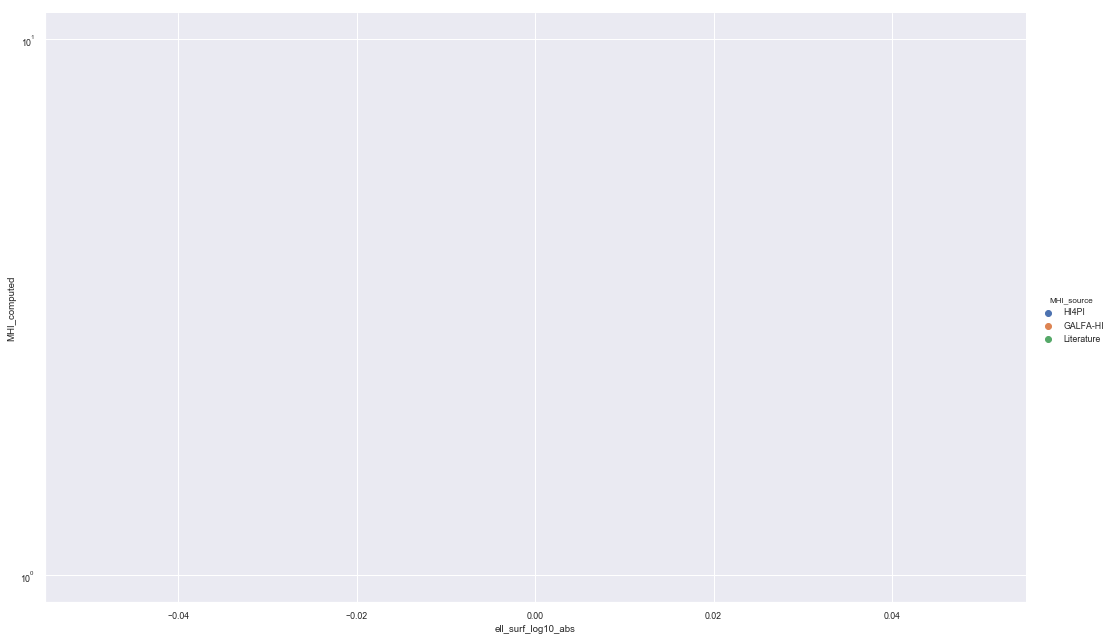

In [231]:
#r_ell, normalized with labels, ylog only scale, split at 0
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_log10_abs', 'MHI_computed').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['ell_surf_log10_abs'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['ell_surf_log10_abs'].iat[i],gals_merged['MHI_computed'].iat[i]))
plt.show()

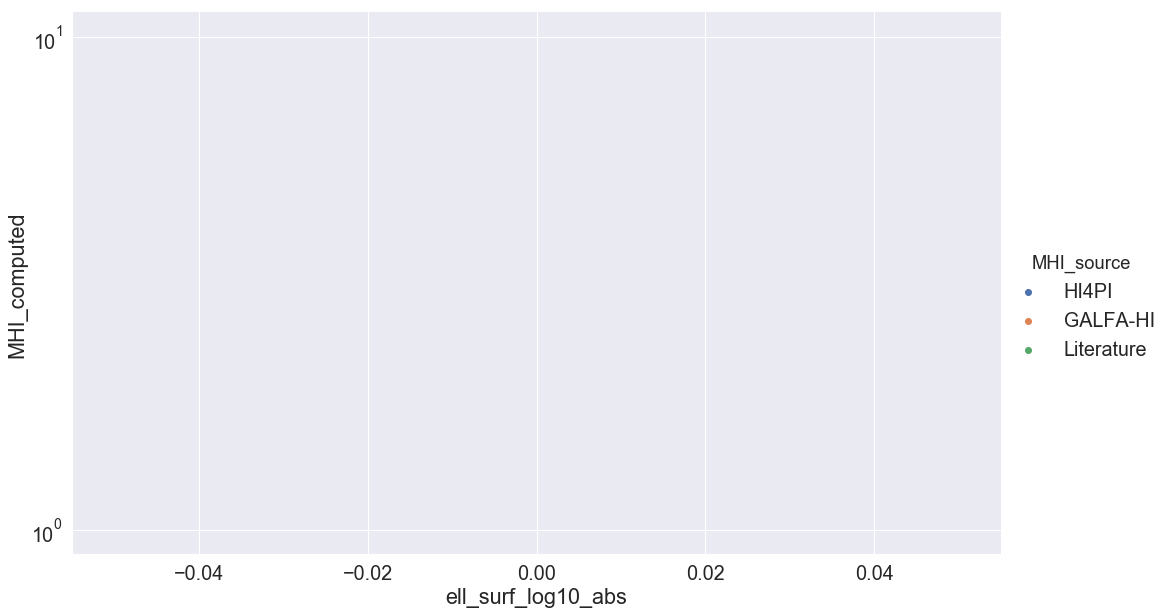

In [113]:
#r_ell, no labels, ylog only scale, split at 0
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_log10_abs', 'MHI_computed').add_legend()
#print(gals_merged.count())
#for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
#    if((pd.notnull(gals_merged['ell_surf_log10_abs'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
#            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
#            #label = txt[0:3]
#            if (len(txt) > 7):
#                label = txt[0:3]+txt[-4:]
#            else:
#                label = txt
#            plt.annotate(label,(gals_merged['ell_surf_log10_abs'].iat[i],gals_merged['MHI_computed'].iat[i]))
plt.show()

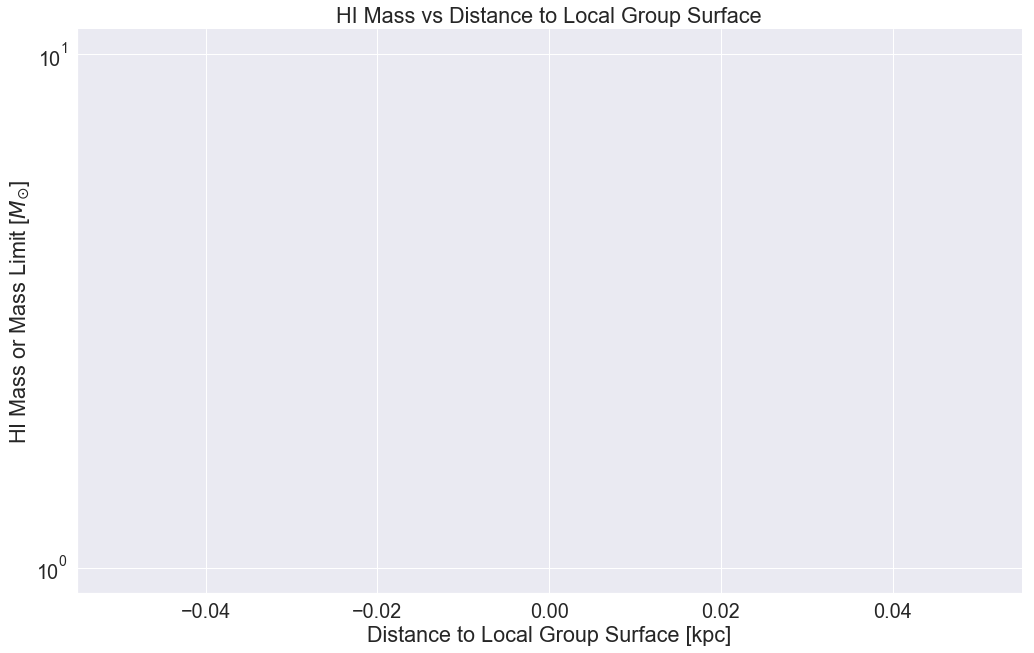

In [114]:
#MHI_computed vs min dist to m31 or mw, whichever is less
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=gals_merged['ell_surf_log10_abs'], y=gals_merged['MHI_computed'],hue=gals_merged['MHI_source'], style=gals_merged['MHI_source'],markers={"Literature": "s", "HI4PI": "v", "GALFA-HI": "v"})
#print(gals_merged.count())

plt.title("HI Mass vs Distance to Local Group Surface")
plt.ylabel("HI Mass or Mass Limit [$M_{\odot}$]")
plt.xlabel("Distance to Local Group Surface [kpc]")
plt.show()

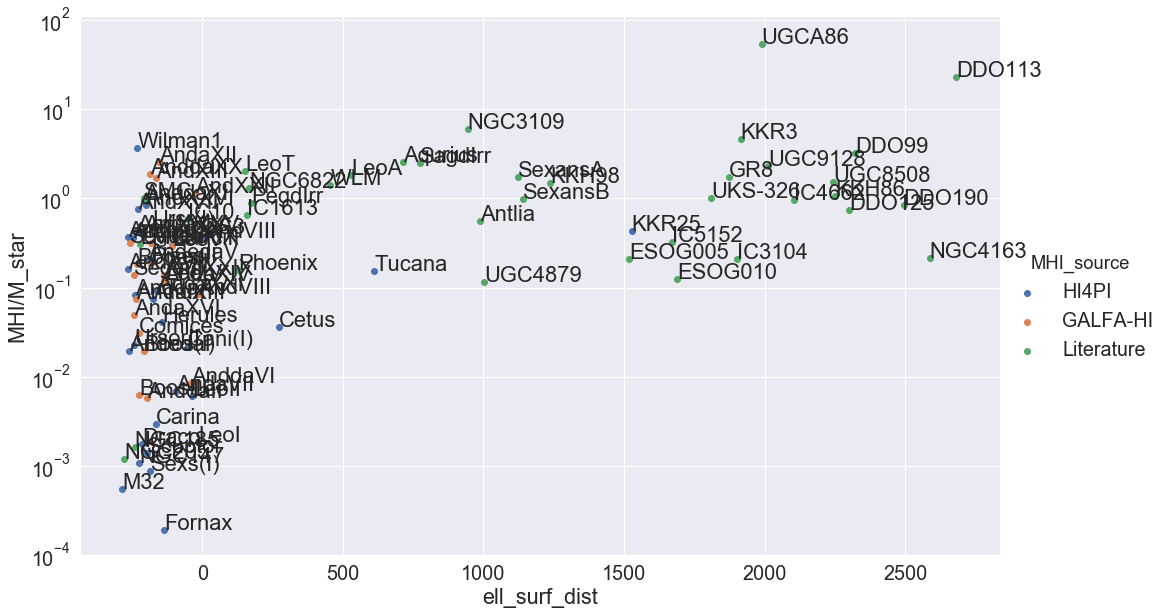

In [116]:
#ell_surf_dist, normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_dist', 'MHI/M_star').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['ell_surf_dist'][i])) & (pd.notnull(gals_merged['MHI/M_star'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['ell_surf_dist'].iat[i],gals_merged['MHI/M_star'].iat[i]))
plt.show()

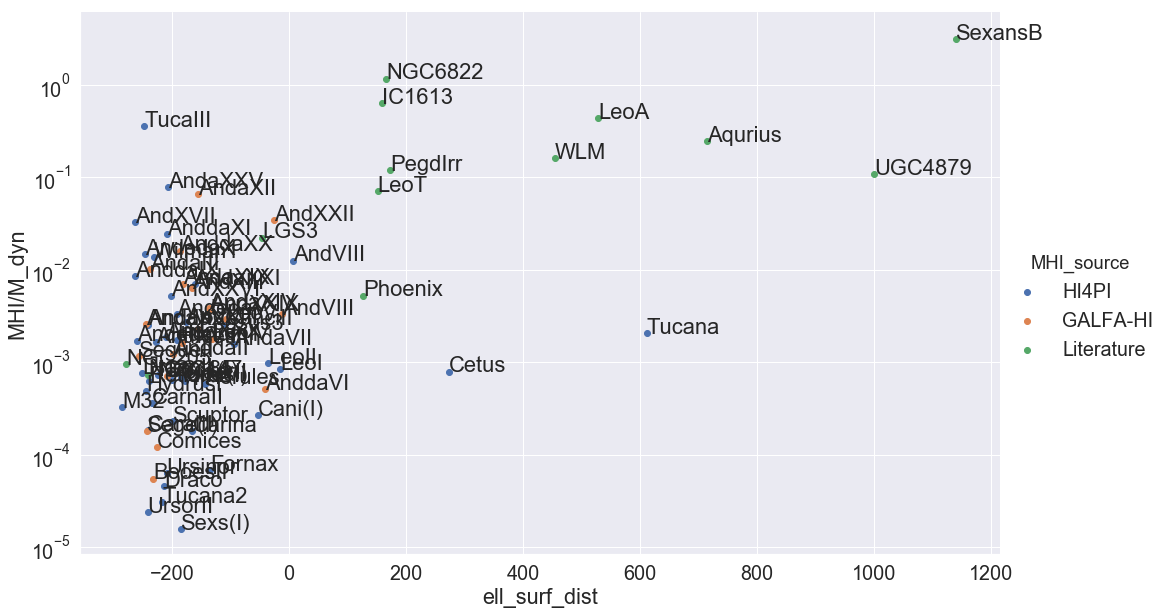

In [117]:
#MHI/M_dyn vs ell_surf_dist, normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_dist', 'MHI/M_dyn').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['ell_surf_dist'][i])) & (pd.notnull(gals_merged['MHI/M_dyn'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['ell_surf_dist'].iat[i],gals_merged['MHI/M_dyn'].iat[i]))
plt.show()

# Save out dwarfs

In [119]:
gals_merged.to_csv('/Users/janagrc/repos/dwarfs/HIdwarflimits/dwarfs.csv')

# Correlations and predictions

In [252]:
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'note', 'M-m', 'Notes', 'ra', 'dec', 'vsig_s_upper_limit',
       'orb_pericenter', 'orb_apocenter', 'orb_eccentricity', 'orb_period',
       'orb_period_type', 'dist_pc', 'dist_kpc', 'dist_mpc', 'MHI_computed',
       'MHI_source', 'MHI_type', '1sigma', 'rh_subtable', 'MHI_method', 'npix',
       'GUU', 'GRU', 'HUU', 'HRU', 'GNV', 'HNV', 'LIT', '1sigma_GUU',
       '1sigma_GRU', '1sigma_HUU', '1sigma_HRU', '1sigma_GNV', '1sigma_HNV',
       'M_star', 'M_dyn_r_h', 'm-M_err', 'Vmag_err', 'vsig_err',
       'MHI_mcconnachie', 'vsig_g_err', 

In [253]:
galaxies = gals_merged[['dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','M_V','ell_surf_dist','M_dyn','vsig_s','vrot_s','vsig_g','vrot_g','muVo','vh(km/s)','MHI_computed']]

In [254]:
spearman_matrix = galaxies.corr(method ='spearman') 

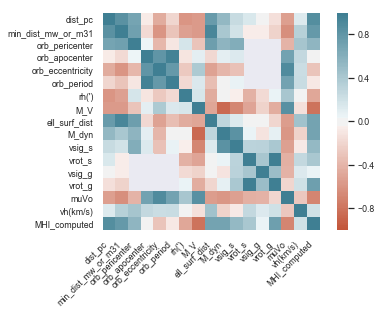

In [255]:
sb.set(font_scale=0.8) 
ax = sb.heatmap(
    spearman_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We use spearman correlation rather than Pearson correlation due to non-gaussian distributions. Many of the correlations will be due to known physical relationships, while others will be due to . Beyond these we may hope to also find real correlations which have not been fully explored and to determine their robustness and their physical origin. We can then use this understanding to predict values in either future observations or simulations, which will have a different set of systematic errors.

# Pair Plots

In [261]:
#Cleaning outliers, but should look into why they are here
gals_merged.loc[gals_merged['GalaxyName'] == 'HIZSS3(A)', 'M_V'] = np.nan
gals_merged.loc[gals_merged['GalaxyName'] == 'HIZSS3B', 'M_V'] = np.nan

#well, we know why this one is this, but I'm taking it out
gals_merged.loc[gals_merged['GalaxyName'] == 'SagittariusSph', 'rh(\')'] = np.nan

In [262]:
#Pare down to intrinsic properties without obvious dependencies (in most cases)
galaxies = gals_merged[['dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','M_V','ell_surf_dist','M_dyn','vsig_s','vrot_s','vsig_g','vrot_g','muVo','vh(km/s)','MHI_computed']]

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


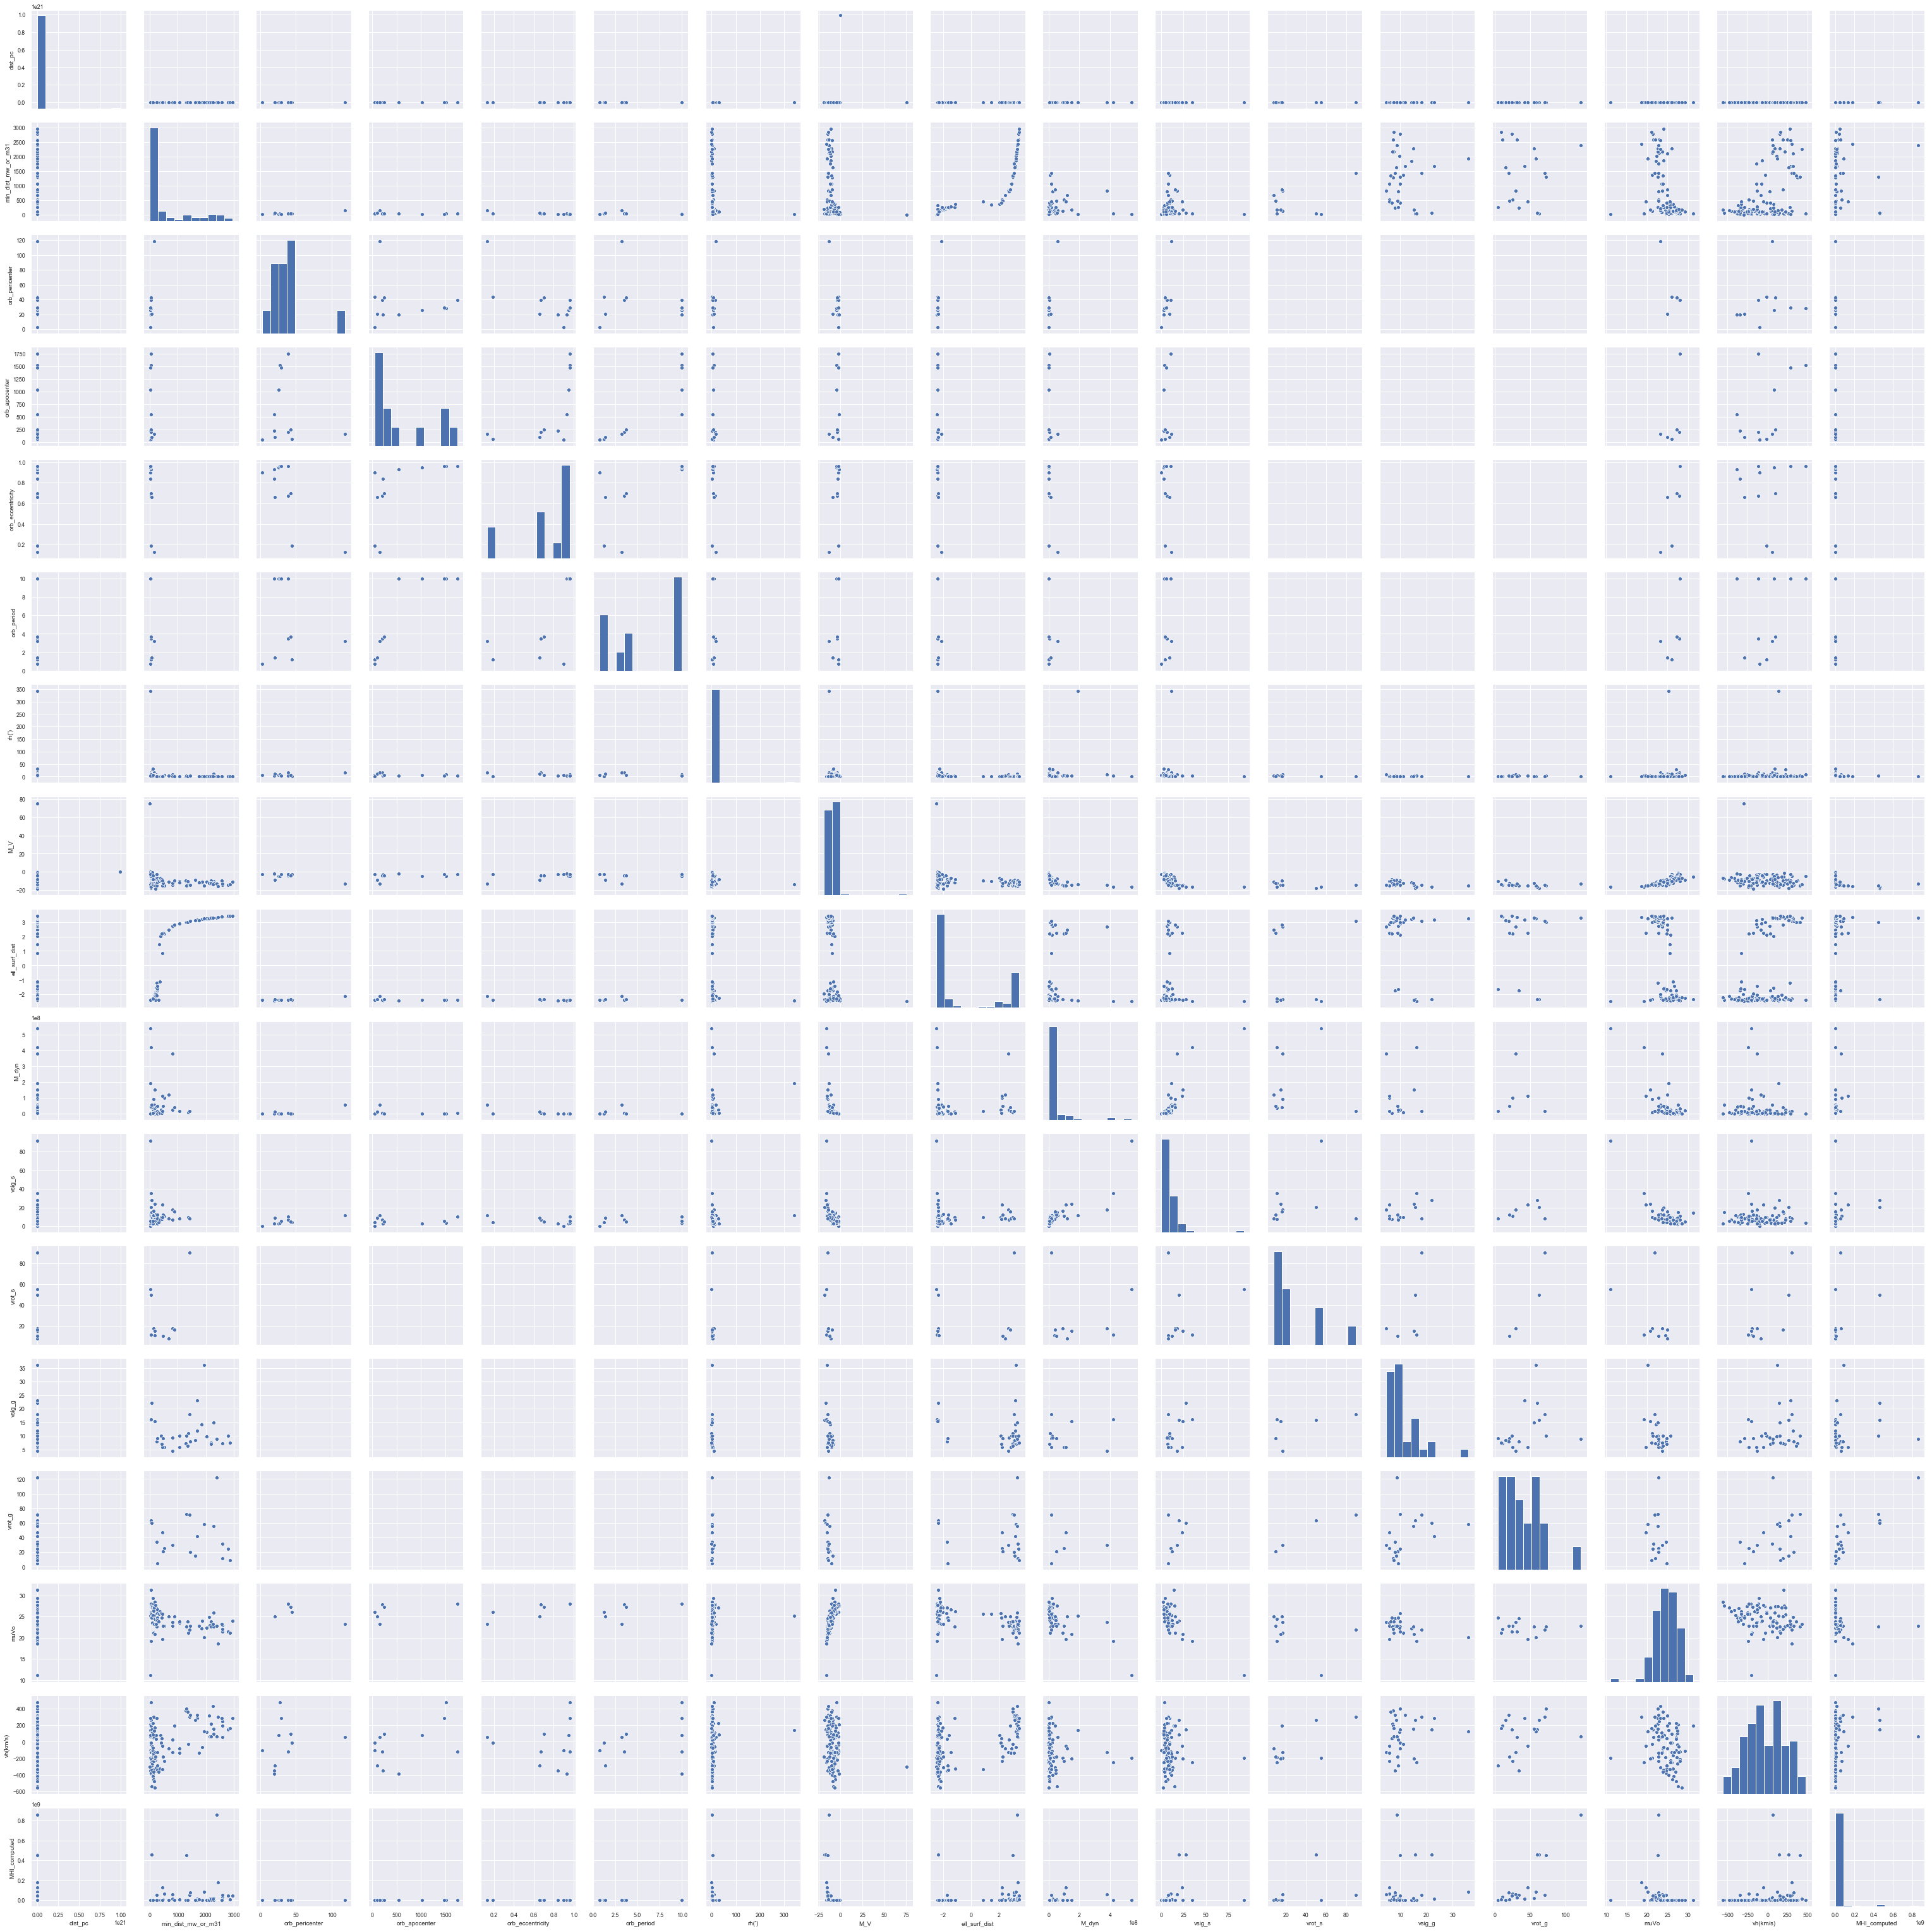

In [263]:
sb.pairplot(galaxies)

# Classification: has gas or doesn't have gas (limit)

In [396]:
galaxies = gals_merged[['dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','M_V','ell_surf_dist','M_dyn','vsig_s','vrot_s','muVo','vh(km/s)','MHI_type']]

In [419]:
galaxies = gals_merged[['dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','M_V','ell_surf_dist','M_dyn','muVo','vh(km/s)','MHI_type']]

In [423]:
galaxies.loc[galaxies['MHI_type'] == 'upper_limit', 'MHI_type'] = 0
galaxies.loc[galaxies['MHI_type'] == 'detected_mass', 'MHI_type'] = 1

In [424]:
galaxies = galaxies[galaxies['MHI_type'].notnull()]

In [460]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = galaxies[['dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','M_V','ell_surf_dist','M_dyn','muVo','vh(km/s)']]
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)

y = galaxies['MHI_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train, y_train = make_classification(n_features=12, random_state=42)

clf = LinearSVC(random_state=42, tol=1e-5)
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [461]:
score = clf.score(X_test, y_test)
score

0.8148148148148148

In [462]:
print(clf.coef_)

[[ 0.29201209 -0.11462779 -0.9163694   0.26325258  0.20761531 -0.35485224
  -0.33170448 -0.05781849  1.2608366  -0.03037254 -0.08909932 -0.57247218]]


In [463]:
print(clf.intercept_)

[-0.09785225]


Choose support vector machine due to this being a classification problem with a small number of samples for which labels exist. Rule of thumb is to have about 10x times the number of features, which we do. The goal is to predict if a dwarf galaxy is detected in HI. Of course the value of the upper limit depends on the physical parameters and therefore.

In [356]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]



figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets

# preprocess dataset, split into training and test part
X = galaxies[:, 0]
y = galaxies[-1]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)

ax.set_title("Input data")
    # Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

    # iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 1944x648 with 0 Axes>

# KMeans experiment

In [146]:
list(gals_merged.columns)

['GalaxyName',
 'RA_hr',
 'RA_min',
 'RA_sec',
 'Dec_deg',
 'Dec_arcmin',
 'Dec_arcsec',
 'EB-V',
 'm-M',
 'm-M_err_pos',
 'm-M_err_neg',
 'vh(km/s)',
 'Vmag',
 'Vmag_err_pos',
 'Vmag_err_neg',
 'PA',
 'e=1-b/a',
 'muVo',
 "rh(')",
 'rh_err_pos',
 'rh_err_neg',
 'vsig_s',
 'vsig_err_pos',
 'vsig_err_neg',
 'vrot_s',
 'vrot_s_err_pos',
 'vrot_s_err_neg',
 'MHI',
 'Data',
 'Key',
 'vsig_g',
 'vsig_g_err_pos',
 'vsig_g_err_neg',
 'vrot_g',
 'note',
 'M-m',
 'Notes',
 'ra',
 'dec',
 'vsig_s_upper_limit',
 'orb_pericenter',
 'orb_apocenter',
 'orb_eccentricity',
 'orb_period',
 'orb_period_type',
 'dist_pc',
 'dist_kpc',
 'dist_mpc',
 'MHI_computed',
 'MHI_source',
 'MHI_type',
 '1sigma',
 'rh_subtable',
 'MHI_method',
 'npix',
 'GUU',
 'GRU',
 'HUU',
 'HRU',
 'GNV',
 'HNV',
 'LIT',
 '1sigma_GUU',
 '1sigma_GRU',
 '1sigma_HUU',
 '1sigma_HRU',
 '1sigma_GNV',
 '1sigma_HNV',
 'M_star',
 'M_dyn_r_h',
 'm-M_err',
 'Vmag_err',
 'vsig_err',
 'MHI_mcconnachie',
 'vsig_g_err',
 'M_dyn',
 'M_dyn_calcu

In [147]:
#galaxies = gals_merged[['dist_pc','min_dist_mw_or_m31','r_per','rh(\')','M-m','dist_kpc','vh(km/s)','MHI_computed']]

In [148]:
galaxies_kmeans = galaxies
galaxies_kmeans.columns

Index(['dist_pc', 'min_dist_mw_or_m31', 'orb_pericenter', 'orb_apocenter',
       'orb_eccentricity', 'orb_period', 'rh(')', 'M_V', 'ell_surf_dist',
       'M_dyn', 'vsig_s', 'vrot_s', 'vsig_g', 'vrot_g', 'muVo', 'vh(km/s)',
       'MHI_computed'],
      dtype='object')

In [150]:
galaxies_kmeans = galaxies_kmeans[galaxies_kmeans['vh(km/s)'] != 999.9]

In [151]:
galaxies_kmeans = galaxies_kmeans.dropna()

In [152]:
galaxies_kmeans = galaxies_kmeans[galaxies_kmeans['MHI_computed'] < 1e8]

In [153]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(galaxies_kmeans)
y_kmeans = kmeans.predict(galaxies_kmeans)

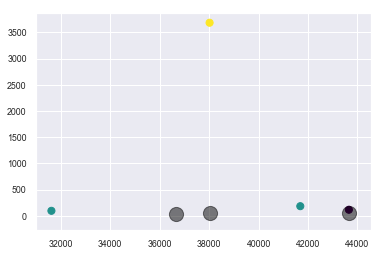

In [155]:
plt.scatter(galaxies_kmeans['dist_pc'],galaxies_kmeans['MHI_computed'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [156]:
plt.scatter(galaxies_kmeans['dist_kpc'],galaxies_kmeans['MHI_computed'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#plt.yscale('log')
plt.xlabel('dist_kpc')
plt.ylabel('MHI')
plt.title('dist v M_HI')
plt.show()
#ax.labels

KeyError: 'dist_kpc'

In [422]:
plt.scatter(galaxies_kmeans['vh(km/s)_x'],galaxies_kmeans['MHI_computed'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.yscale('log')
plt.xlabel('vh(km/s)_x')
plt.ylabel('MHI')
plt.title('vh(km/s)_x v M_HI')
plt.show()
#ax.labels

KeyError: 'vh(km/s)_x'

In [60]:
galaxies.columns

Index(['GalaxyName', 'RA1', 'RA2', 'RA3', 'Dec1', 'Dec2', 'Dec3', 'M-m',
       'mystery1', 'mystery2', 'vh(km/s)_x', 'mystery3', 'mystery4', 'MHI_x',
       'Data', 'Notes', 'dist_pc', 'dist_kpc', 'dist_mpc', 'MHI_computed',
       'MHI_source', 'MHI_type', 'type_color', 'source_color', 'RA_h', 'RA_m',
       'RA_s', 'Dec_d', 'Dec_m', 'Dec_s', 'Dist', 'sig1', 'sig2', 'vh(km/s)_y',
       'MHI_y', 'r_ell', 'ell_surf_dist'],
      dtype='object')

In [61]:
galaxies[galaxies['MHI_computed'].isnull()]

,GalaxyName,RA1,RA2,RA3,Dec1,Dec2,Dec3,M-m,mystery1,mystery2,...,Dec_d,Dec_m,Dec_s,Dist,sig1,sig2,vh(km/s)_y,MHI_y,r_ell,ell_surf_dist
0,CanisMajor,7,12,35.0,-27,40,0,14.29,0.30,0.30,...,-27,40,0,14.29,0.30,0.30,87.0,0.0,521.726269,-240.536834
1,SagittariusdSph,18,55,19.5,-30,32,43,17.10,0.15,0.15,...,-30,32,43,17.10,0.15,0.15,140.0,0.0,527.702779,-234.311090
6,CetusII,1,17,52.8,-17,25,12,17.38,0.19,0.19,...,-17,25,12,17.38,0.19,0.19,999.9,0.0,506.459098,-235.751781
12,ComaBerenices,12,26,59.0,23,54,15,18.20,0.20,0.20,...,23,54,15,18.20,0.20,0.20,98.1,0.0,546.569026,-207.672164
13,TucanaIV,0,2,55.2,-60,51,0,18.41,0.19,0.19,...,-60,51,0,18.41,0.19,0.19,999.9,0.0,539.101426,-208.632619
15,GrusII,22,4,4.8,-46,26,24,18.62,0.21,0.21,...,-46,26,24,18.62,0.21,0.21,999.9,0.0,535.595765,-207.749528
17,TucanaV,23,37,24.0,-63,16,12,18.71,0.34,0.34,...,-63,16,12,18.71,0.34,0.34,999.9,0.0,547.343952,-201.350328
19,SagittariusII,19,52,40.5,-22,4,5,19.13,0.15,0.15,...,-22,4,5,19.13,0.15,0.15,999.9,0.0,542.119538,-197.293162
23,UrsaMinor,15,9,8.5,67,13,21,19.40,0.10,0.10,...,67,13,21,19.40,0.10,0.10,-246.9,0.0,520.479499,-197.945465
24,HorologiumII,3,16,32.1,-50,1,5,19.46,0.20,0.20,...,-50,1,5,19.46,0.20,0.20,999.9,0.0,563.335104,-177.197157


## Google Sheets API

In [2]:
#Google Sheets
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

In [ ]:
# The ID and range of a sample spreadsheet.
SAMPLE_SPREADSHEET_ID = '1BxiMVs0XRA5nFMdKvBdBZjgmUUqptlbs74OgvE2upms'
SAMPLE_RANGE_NAME = 'Class Data!A2:E'

In [ ]:
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

# The ID and range of a sample spreadsheet.
SAMPLE_SPREADSHEET_ID = '1BxiMVs0XRA5nFMdKvBdBZjgmUUqptlbs74OgvE2upms'
SAMPLE_RANGE_NAME = 'Class Data!A2:E'

def main():
    """Shows basic usage of the Sheets API.
    Prints values from a sample spreadsheet.
    """
    creds = None
    # The file token.pickle stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('sheets', 'v4', credentials=creds)

    # Call the Sheets API
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range=SAMPLE_RANGE_NAME).execute()
    values = result.get('values', [])

    if not values:
        print('No data found.')
    else:
        print('Name, Major:')
        for row in values:
            # Print columns A and E, which correspond to indices 0 and 4.
            print('%s, %s' % (row[0], row[4]))

if __name__ == '__main__':
    main()